# Dynamic Pricing System

This dataset contains ride details from Uber and Lyft, including timestamps, locations, cab types, ride prices, distances, and various weather conditions. The goal is to analyze factors affecting ride prices and build a model that predicts real-time fares. By considering elements like surge pricing, temperature, wind speed, and demand patterns, the model will help optimize pricing strategies, maximize revenue, and ensure fair fares for customers.








In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("rideshare.csv")

In [3]:
data.sample(5)

id     timestamp  hour  day  month  \
573948  01e1996c-fbd9-4fce-9166-2bc69d0a2840  1.543448e+09    23   28     11   
482338  c3d8af44-c45c-42a5-9597-57e3480e2e7e  1.543502e+09    14   29     11   
527134  cfc2c93c-7c31-4cb0-855e-b3fbd6052161  1.543343e+09    18   27     11   
154645  74efc7d7-1f23-4364-8e3b-08fc702c9fff  1.545143e+09    14   18     12   
571443  bdfd7974-a01c-46e9-a92e-42d3903e1d95  1.543499e+09    13   29     11   

                   datetime          timezone             source  \
573948  2018-11-28 23:38:41  America/New_York  Boston University   
482338  2018-11-29 14:27:56  America/New_York           West End   
527134  2018-11-27 18:15:23  America/New_York      South Station   
154645  2018-12-18 14:25:05  America/New_York           Back Bay   
571443  2018-11-29 13:43:00  America/New_York             Fenway   

               destination cab_type  ... precipIntensityMax uvIndexTime  \
573948            West End     Uber  ...             0.0001  1543420800   
482338       South Station     Lyft  ...             0.0000  1543510800   
527134         Beacon Hill     Uber  ...             0.1419  1543338000   
154645           North End     Uber  ...             0.0029  1545152400   
571443  Financial District     Lyft  ...             0.0000  1543510800   

        temperatureMin  temperatureMinTime  temperatureMax  \
573948           33.10          1543402800           42.18   
482338           35.20          1543550400           44.96   
527134           35.76          1543377600           46.35   
154645           23.05          1545192000           37.96   
571443           35.26          1543550400           44.89   

        temperatureMaxTime  apparentTemperatureMin  \
573948          1543420800                   29.11   
482338          1543510800                   31.40   
527134          1543320000                   31.80   
154645          1545109200                   11.83   
571443          1543510800                   31.25   

        apparentTemperatureMinTime  apparentTemperatureMax  \
573948                  1543392000                   35.75   
482338                  1543550400                   38.85   
527134                  1543377600                   43.38   
154645                  1545134400                   31.85   
571443                  1543550400                   38.68   

       apparentTemperatureMaxTime  
573948                 1543420800  
482338                 1543510800  
527134                 1543320000  
154645                 1545109200  
571443                 1543510800  

[5 rows x 57 columns]

In [4]:
data.shape

(693071, 57)

In [5]:
data.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat


# data overview

id – Unique identifier for each ride.

timestamp – Specific timestamp when the ride was booked.

hour – Hour of the day when the ride was booked (0-23).

day – Day of the month when the ride was booked (1-31).

month – Month when the ride was booked (1-12).

datetime – Full datetime value representing the exact booking time.

timezone – Timezone in which the ride was booked.

source – Starting location of the ride.

destination – Ending location of the ride.

product_id – Unique identifier for a specific cab type.

name – Name of the cab type (e.g., UberX, Lyft Lux, etc.).

price – Fare of the ride (Target variable).

distance – Total distance of the ride (in miles or km).

surge_multiplier – Surge pricing factor (higher values mean increased prices).

latitude – Latitude of the pickup location.

longitude – Longitude of the pickup location.

Weather Conditions (Which May Impact Price)

temperature – Current temperature at the time of booking.

apparentTemperature – "Feels-like" temperature based on wind chill or humidity.

short_summary – Short weather description (e.g., "Clear", "Rainy").

long_summary – Detailed weather description.

precipIntensity – Intensity of rain or snow (inches per hour).

precipProbability – Probability of precipitation (0-1 scale).

humidity – Atmospheric humidity level (0-1 scale).

windSpeed – Wind speed (mph or km/h).

windGust – Maximum wind gust speed.

windGustTime – Time when the wind gust was at its peak.

visibility – Visibility level (in miles or km).

icon – Weather icon representing specific conditions.

dewPoint – Temperature at which condensation begins.

pressure – Atmospheric pressure (in hPa).

windBearing – Wind direction (in degrees).

cloudCover – Percentage of sky covered by clouds (0-1 scale).

uvIndex – UV radiation level (scale of 1-11).

ozone – Ozone concentration level.

sunriseTime – Time of sunrise.

sunsetTime – Time of sunset.

moonPhase – Moon phase (0 = new moon, 1 = full moon).

temperatureHigh – Maximum temperature of the day.

temperatureHighTime – Time when the maximum temperature occurred.

temperatureLow – Minimum temperature of the day.

temperatureLowTime – Time when the minimum temperature occurred.

apparentTemperatureHigh – Maximum "feels-like" temperature.

apparentTemperatureHighTime – Time when the highest apparent temperature occurred.

apparentTemperatureLow – Minimum "feels-like" temperature.

apparentTemperatureLowTime – Time when the lowest apparent temperature occurred.

precipIntensityMax – Maximum precipitation intensity during the day.

uvIndexTime – Time when the UV index was at its peak.

temperatureMin – Lowest temperature of the day.

temperatureMinTime – Time when the lowest temperature was recorded.

temperatureMax – Highest temperature of the day.

temperatureMaxTime – Time when the highest temperature was recorded.

apparentTemperatureMin – Lowest "feels-like" temperature.

apparentTemperatureMinTime – Time when the lowest apparent temperature was recorded.

apparentTemperatureMax – Highest "feels-like" temperature.

apparentTemperatureMaxTime – Time when the highest apparent temperature was recorded.

#Note: visibility.1 might be a duplicate of visibility, so you may want to verify its relevance but there meaning is there visibility clear in weather in percentage level.

In [6]:
data["visibility"] , data["visibility.1"] 

(0         10.000
 1          4.786
 2         10.000
 3         10.000
 4         10.000
            ...  
 693066     9.785
 693067     9.785
 693068     9.785
 693069     9.785
 693070     9.785
 Name: visibility, Length: 693071, dtype: float64,
 0         10.000
 1          4.786
 2         10.000
 3         10.000
 4         10.000
            ...  
 693066     9.785
 693067     9.785
 693068     9.785
 693069     9.785
 693070     9.785
 Name: visibility.1, Length: 693071, dtype: float64)

Yes, both columns are the same, so we will keep only one of them.

The id column is a unique identifier with no impact on price prediction, as it doesn’t hold any meaningful patterns. It should be dropped to avoid unnecessary complexity.








In [7]:
df = data.drop(columns = ["visibility.1" , "id"])

In [8]:
df.sample()

timestamp  hour  day  month             datetime          timezone  \
496256  1.544758e+09     3   14     12  2018-12-14 03:30:12  America/New_York   

        source destination cab_type                            product_id  \
496256  Fenway    Back Bay     Uber  6f72dfc5-27f1-42e8-84db-ccc7a75f6969   

        ... precipIntensityMax  uvIndexTime  temperatureMin  \
496256  ...             0.0001   1544716800           18.24   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
496256          1544688000           33.96          1544731200   

        apparentTemperatureMin  apparentTemperatureMinTime  \
496256                   13.72                  1544688000   

       apparentTemperatureMax apparentTemperatureMaxTime  
496256                  32.95                 1544734800  

[1 rows x 55 columns]

#First, we will check if there are any duplicate rows in the data.


In [9]:
df.duplicated().sum()

1046

In [10]:
df.shape

(693071, 55)

With 693,071 rows and only 1,046 duplicates, dropping them is the right choice as their impact is minimal

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

now' i will check is there null values or not ?

In [13]:
df.isnull().mean()*100

timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.904772
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000
windGust                       0.000000


In [14]:
df["price"].describe()

count    637322.000000
mean         16.547041
std           9.325415
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [15]:
df["price"].median()

13.5

We can't impute using the mean because outliers can skew it, making the imputed values less reliable. that's why we use the median, as it is resistant to outliers and provides a more stable imputation.

In [16]:
df["price"].fillna(df["price"].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10132\1467048696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["price"].fillna(df["price"].median(),inplace=True)


In [17]:
df["price"].isnull().sum()

0

now i will check the datatypes are correct or not .

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692025 entries, 0 to 693070
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    692025 non-null  float64
 1   hour                         692025 non-null  int64  
 2   day                          692025 non-null  int64  
 3   month                        692025 non-null  int64  
 4   datetime                     692025 non-null  object 
 5   timezone                     692025 non-null  object 
 6   source                       692025 non-null  object 
 7   destination                  692025 non-null  object 
 8   cab_type                     692025 non-null  object 
 9   product_id                   692025 non-null  object 
 10  name                         692025 non-null  object 
 11  price                        692025 non-null  float64
 12  distance                     692025 non-null  float64
 13  surg

now i will check there is empty values or not

In [19]:
(df == " ").sum().sum()

0

In [20]:
df.describe()

timestamp           hour            day          month  \
count  6.920250e+05  692025.000000  692025.000000  692025.000000   
mean   1.544046e+09      11.619087      17.789453      11.586993   
std    6.892041e+05       6.947635       9.982330       0.492374   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543738e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  692025.000000  692025.000000     692025.000000  692025.000000   
mean       16.306180       2.189800          1.013891      42.338172   
std         8.986935       1.139015          0.091709       0.047839   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.500000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.930000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  692025.000000  692025.000000  ...       692025.000000  6.920250e+05   
mean      -71.066151      39.583761  ...            0.037357  1.544044e+09   
std         0.020302       6.727239  ...            0.055203  6.912145e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   692025.000000        6.920250e+05   692025.000000        6.920250e+05   
mean        33.456382        1.544042e+09       45.261671        1.544048e+09   
std          6.468031        6.902051e+05        5.646041        6.901450e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           692025.000000                6.920250e+05   
mean                29.729547                1.544048e+09   
std                  7.111634                6.871984e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           692025.000000                6.920250e+05  
mean                41.998250                1.544048e+09  
std                  6.937755                6.910864e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 45 columns]

First, we will analyze the target variable's distribution using a boxplot to check for the presence of outliers.

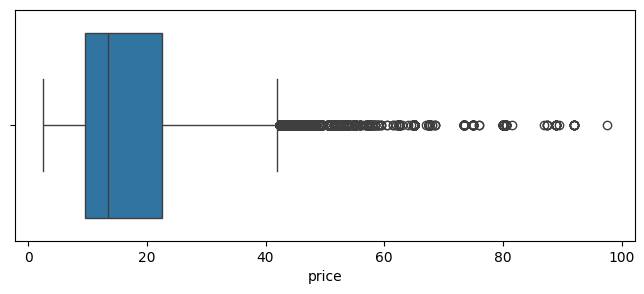

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
sns.boxplot(data=df , x="price" )
plt.show()

Outliers should be removed because they can bias the model, leading to inaccurate price predictions. Treating them ensures the model captures genuine pricing patterns rather than being influenced by extreme, rare cases.


i will revome them after EDA , to analysis patterns.

In [22]:
df.shape

(692025, 55)

Now, I will perform EDA and analyze the relationship of each feature with price to understand which features are useful and which are not then do feature engineering








In [23]:
df.head(3)

timestamp  hour  day  month             datetime          timezone  \
0  1.544953e+09     9   16     12  2018-12-16 09:30:07  America/New_York   
1  1.543284e+09     2   27     11  2018-11-27 02:00:23  America/New_York   
2  1.543367e+09     1   28     11  2018-11-28 01:00:22  America/New_York   

             source    destination cab_type    product_id  ...  \
0  Haymarket Square  North Station     Lyft     lyft_line  ...   
1  Haymarket Square  North Station     Lyft  lyft_premier  ...   
2  Haymarket Square  North Station     Lyft          lyft  ...   

  precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
0             0.1276   1544979600           39.89          1545012000   
1             0.1300   1543251600           40.49          1543233600   
2             0.1064   1543338000           35.36          1543377600   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0           43.68          1544968800                   33.73   
1           47.30          1543251600                   36.20   
2           47.55          1543320000                   31.04   

   apparentTemperatureMinTime apparentTemperatureMax  \
0                  1545012000                  38.07   
1                  1543291200                  43.92   
2                  1543377600                  44.12   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  

[3 rows x 55 columns]

Since timestamp and datetime contain the same information as hour, day, and month, we can drop them and analyze price based on hour, day, and month

In [24]:
df2 = df.drop(columns =["timestamp", "datetime"])

In [25]:
df2.sample()

hour  day  month          timezone              source    destination  \
234957     1   17     12  America/New_York  Financial District  South Station   

       cab_type product_id  name  price  ...  precipIntensityMax  uvIndexTime  \
234957     Lyft       lyft  Lyft    7.0  ...              0.1261   1544979600   

        temperatureMin  temperatureMinTime  temperatureMax  \
234957           39.07          1544954400            43.7   

        temperatureMaxTime apparentTemperatureMin apparentTemperatureMinTime  \
234957          1544990400                  33.64                 1545019200   

        apparentTemperatureMax  apparentTemperatureMaxTime  
234957                   38.29                  1544986800  

[1 rows x 53 columns]

In [26]:
df2["hour"].value_counts()

hour
0     32344
23    31864
17    30357
18    30350
15    30344
12    30342
11    30341
16    30340
13    30333
14    30332
10    30323
22    29381
9     28930
2     28511
1     28498
4     28293
3     27777
21    27679
19    27517
6     27288
20    26750
5     24979
7     24900
8     24252
Name: count, dtype: int64

In [27]:
def categorize_hour(hour):
    if hour in [0, 23, 12, 15, 18, 16, 10, 17, 13, 14]:  
        return "Peak"
    elif hour in [11, 22, 9, 1, 2, 4, 3]: 
        return "Medium"
    else: 
        return "Low"

df2["hour"] = df2["hour"].apply(categorize_hour)

print(df2["hour"].value_counts())

hour
Peak      306929
Medium    201731
Low       183365
Name: count, dtype: int64


In [28]:
df2.groupby("hour")["price"].mean()

hour
Low       16.317948
Medium    16.312081
Peak      16.295270
Name: price, dtype: float64

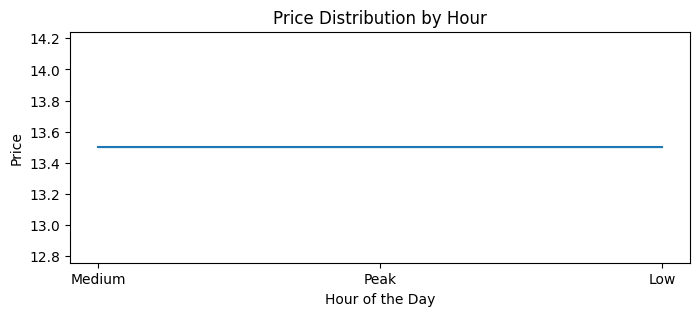

In [29]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df2 , x="hour",y="price" , estimator="median" ) 
plt.xlabel("Hour of the Day")
plt.ylabel("Price")
plt.title("Price Distribution by Hour")
plt.show()

In my analysis, I found that prices are slightly lower during peak hours compared to others. However, the variation is minimal, so the impact is small. Therefore, we can include hour as a feature in the model.








In [30]:
df2["day"].value_counts()

day
27    75922
28    73481
29    59872
1     45199
30    45041
14    44893
15    44893
17    44883
2     44880
16    44876
3     44875
13    38487
18    36164
26    31495
4     12627
10     2764
9      1673
Name: count, dtype: int64

In [31]:
data["day2"] = pd.to_datetime(data["datetime"]).dt.day
data["day2"].value_counts()

day2
27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: count, dtype: int64

I checked the day column, and it contains only some dates, not the full month's days. I also verified the original datetime column, and it's the same. now i found the parttens in this 

In [32]:
day_byprice = df2.groupby("day")["price"].mean()

In [33]:
day_byprice

day
1     16.333049
2     16.304802
3     16.229370
4     16.405045
9     16.512253
10    16.184334
13    16.348246
14    16.317485
15    16.316464
16    16.342722
17    16.262624
18    16.327674
26    16.288728
27    16.352879
28    16.292779
29    16.326012
30    16.190479
Name: price, dtype: float64

there is no diffrenece in price when the days are changing 

In [34]:
def categorize_day(day):
    if day in [1,2,3,4,9,10,13 ,14]:  
        return "Peakday"
    elif day in [15,16,17,18, 26,27]: 
        return "Mediumday"
    else: 
        return "Lowday"

df2["day"] = df2["day"].apply(categorize_day)

In [35]:
print(df2.groupby("day")["price"].mean())

day
Lowday       16.278104
Mediumday    16.320268
Peakday      16.310805
Name: price, dtype: float64


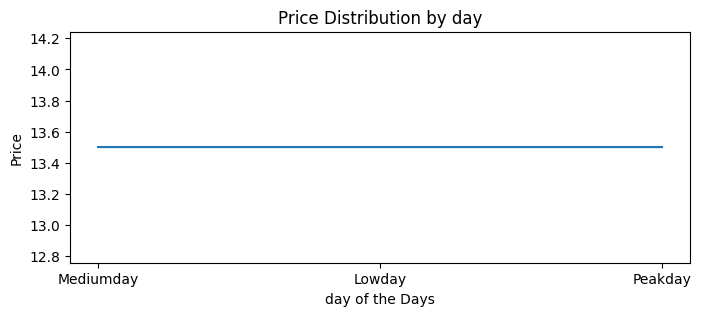

In [36]:
plt.figure(figsize=(8,3))
sns.lineplot(data=df2 , x="day",y="price" , estimator="median" ) 
plt.xlabel("day of the Days")
plt.ylabel("Price")
plt.title("Price Distribution by day")
plt.show()

there is no difference in days to price.

In [37]:
df2["month"].value_counts()

month
12    406214
11    285811
Name: count, dtype: int64

In [38]:
data["month"] = pd.to_datetime(data["datetime"]).dt.month
data["month"].value_counts()

month
12    406614
11    286457
Name: count, dtype: int64

The data contains only months 11 and 12. I verified this with the original datetime column, which also shows the same. So, I will proceed with the analysis based on the available months.

In [39]:
month_price = df2.groupby("month")["price"].mean()
month_price

month
11    16.299138
12    16.311134
Name: price, dtype: float64

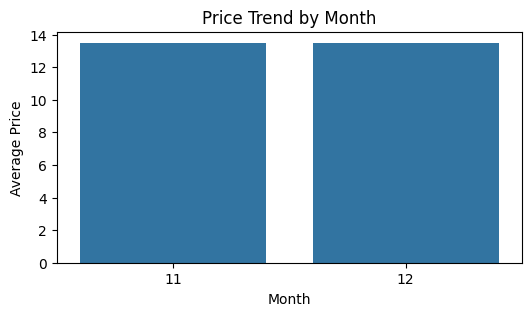

In [40]:
plt.figure(figsize=(6,3))
sns.barplot(data=df2, x="month", y="price" ,estimator="median")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Price Trend by Month")
plt.show()

so there is no diffrence in month with price month doesnt matter in price to much 

In [41]:
df2.head()

hour        day  month          timezone            source  \
0  Medium  Mediumday     12  America/New_York  Haymarket Square   
1  Medium  Mediumday     11  America/New_York  Haymarket Square   
2  Medium     Lowday     11  America/New_York  Haymarket Square   
3  Medium     Lowday     11  America/New_York  Haymarket Square   
4  Medium     Lowday     11  America/New_York  Haymarket Square   

     destination cab_type    product_id          name  price  ...  \
0  North Station     Lyft     lyft_line        Shared    5.0  ...   
1  North Station     Lyft  lyft_premier           Lux   11.0  ...   
2  North Station     Lyft          lyft          Lyft    7.0  ...   
3  North Station     Lyft   lyft_luxsuv  Lux Black XL   26.0  ...   
4  North Station     Lyft     lyft_plus       Lyft XL    9.0  ...   

   precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
0              0.1276   1544979600           39.89          1545012000   
1              0.1300   1543251600           40.49          1543233600   
2              0.1064   1543338000           35.36          1543377600   
3              0.0000   1543507200           34.67          1543550400   
4              0.0001   1543420800           33.10          1543402800   

   temperatureMax  temperatureMaxTime apparentTemperatureMin  \
0           43.68          1544968800                  33.73   
1           47.30          1543251600                  36.20   
2           47.55          1543320000                  31.04   
3           45.03          1543510800                  30.30   
4           42.18          1543420800                  29.11   

  apparentTemperatureMinTime  apparentTemperatureMax  \
0                 1545012000                   38.07   
1                 1543291200                   43.92   
2                 1543377600                   44.12   
3                 1543550400                   38.53   
4                 1543392000                   35.75   

   apparentTemperatureMaxTime  
0                  1544958000  
1                  1543251600  
2                  1543320000  
3                  1543510800  
4                  1543420800  

[5 rows x 53 columns]

In [42]:
df2["timezone"].value_counts()

timezone
America/New_York    692025
Name: count, dtype: int64

The timezone column has only one category, so it does not impact the price and can be not use in model.

In [43]:
df3 = df2.drop(columns="timezone")

In [44]:
df3.sample()

hour      day  month    source              destination cab_type  \
625526  Peak  Peakday     12  Back Bay  Northeastern University     Uber   

                                  product_id  name  price  distance  ...  \
625526  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a  Taxi   13.5      1.22  ...   

        precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
625526                 0.0   1544806800           26.93          1544788800   

        temperatureMax temperatureMaxTime apparentTemperatureMin  \
625526           46.68         1544814000                  27.58   

        apparentTemperatureMinTime  apparentTemperatureMax  \
625526                  1544788800                   43.98   

        apparentTemperatureMaxTime  
625526                  1544817600  

[1 rows x 52 columns]

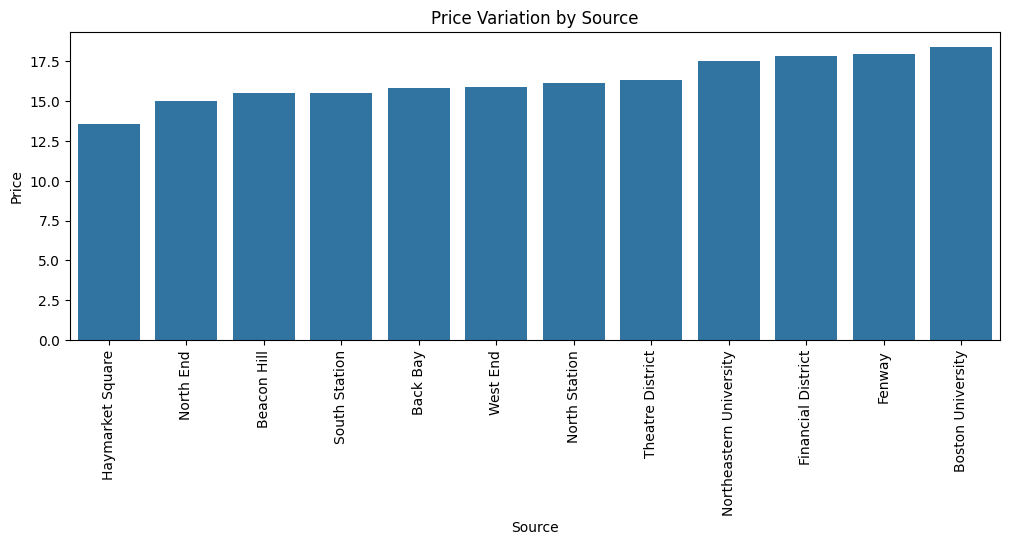

In [45]:
import numpy as np 
source_price = df3.groupby("source")["price"].mean().reset_index()
source_price = source_price.sort_values(by="price", ascending=True)
plt.figure(figsize=(12,4))
sns.barplot(data=source_price, x="source", y="price" , estimator="median")
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Price Variation by Source")
plt.xticks(rotation=90)
plt.show()

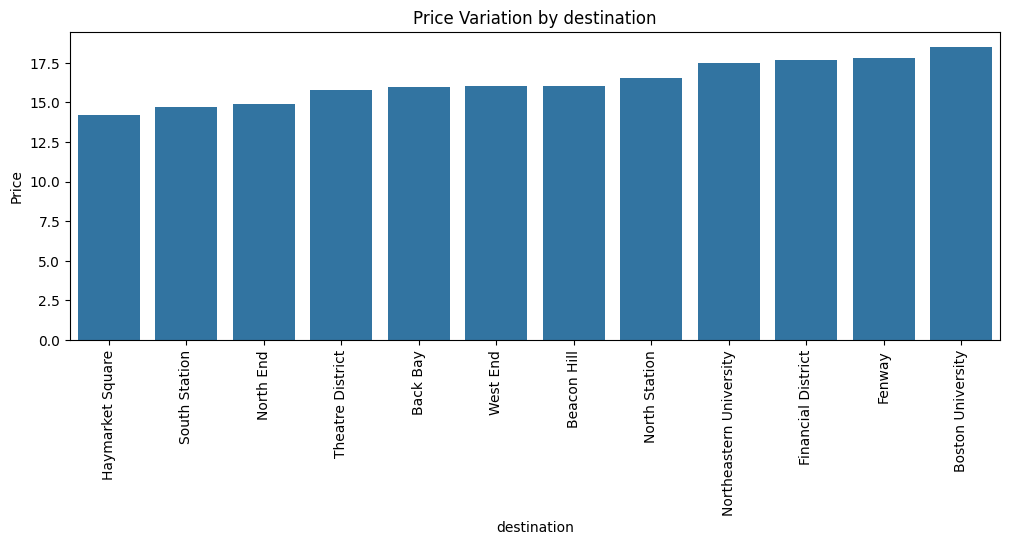

In [46]:
source_price = df3.groupby("destination")["price"].mean().reset_index()
source_price = source_price.sort_values(by="price", ascending=True)
plt.figure(figsize=(12,4))
sns.barplot(data=source_price, x="destination", y="price" , estimator="median")
plt.xlabel("destination")
plt.ylabel("Price")
plt.title("Price Variation by destination")
plt.xticks(rotation=90)
plt.show()

In this analysis, we can see that certain locations, such as North Station, Financial District, Northeastern University, Fenway, and Boston University, have higher prices compared to others. Haymarket Square has the lowest prices among all locations. There is also variation in the middle range, indicating that price fluctuations depend on changes in source and destination during pickup and drop-off.

In [47]:
df3.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object

In [48]:
df3[["latitude","longitude"]].head()  , df3[['source', 'destination']].head()

(   latitude  longitude
 0   42.2148    -71.033
 1   42.2148    -71.033
 2   42.2148    -71.033
 3   42.2148    -71.033
 4   42.2148    -71.033,
              source    destination
 0  Haymarket Square  North Station
 1  Haymarket Square  North Station
 2  Haymarket Square  North Station
 3  Haymarket Square  North Station
 4  Haymarket Square  North Station)

In [49]:
df3[["latitude","longitude"]].tail()  , df3[['source', 'destination']].tail()

(        latitude  longitude
 693066   42.3519   -71.0643
 693067   42.3519   -71.0643
 693068   42.3519   -71.0643
 693069   42.3519   -71.0643
 693070   42.3519   -71.0643,
           source destination
 693066  West End   North End
 693067  West End   North End
 693068  West End   North End
 693069  West End   North End
 693070  West End   North End)

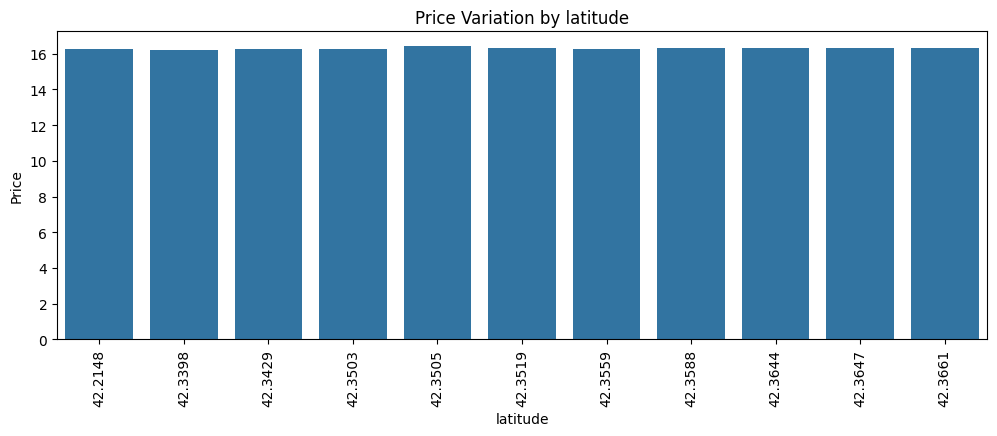

In [50]:
source_price = df3.groupby("latitude")["price"].mean().reset_index()
source_price = source_price.sort_values(by="price", ascending=True)
plt.figure(figsize=(12,4))
sns.barplot(data=source_price, x="latitude", y="price" , estimator="median")
plt.xlabel("latitude")
plt.ylabel("Price")
plt.title("Price Variation by latitude")
plt.xticks(rotation=90)
plt.show()

Both pairs,source & destination and latitude & longitude—provide the same location information. Since latitude & longitude have no clear relationship with price, we will use source & destination .








In [51]:
df4 = df3.drop(columns=["latitude","longitude"])

In [52]:
df4["cab_type"].value_counts(normalize=True) * 100

cab_type
Uber    55.601026
Lyft    44.398974
Name: proportion, dtype: float64

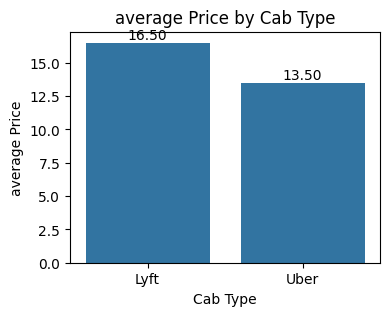

In [53]:
plt.figure(figsize=(4,3))
ax = sns.barplot(data=df4, x="cab_type", y="price", estimator="median")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.xlabel("Cab Type")
plt.ylabel("average Price")
plt.title("average Price by Cab Type")
plt.show()

I analyzed that Lyft cabs have slightly higher prices than Uber. The difference is not significant, but it exists, and there could be various reasons behind it.

thats why the ratio of cabtype is uber high the uber cabs get more than lyft.

In [54]:
df4["product_id"].value_counts()

product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55030
997acbb5-e102-41e1-b155-9df7de0a73f2    55020
6d318bcc-22a3-4af6-bddd-b409bfce1546    55012
6c84fd89-3f11-4782-9b50-97c468b19529    55011
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55003
55c66225-fbe7-4fd5-9072-eab1ece5e23e    54994
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    54703
lyft_line                               51215
lyft_luxsuv                             51215
lyft_premier                            51211
lyft                                    51206
lyft_lux                                51205
lyft_plus                               51200
Name: count, dtype: int64

product_id – Unique identifier for a specific cab type.


These XYZ Uber IDs, like "997acbb5-e102-41e1-b155-9df7de0a73f2," are not interpretable, so I will rename them as "UberService 1," "UberService 2," "UberService 3," etc. without any domain knowledge








In [55]:
uber_ids = [
    "997acbb5-e102-41e1-b155-9df7de0a73f2",
    "9a0e7b09-b92b-4c41-9779-2ad22b4d779d",
    "55c66225-fbe7-4fd5-9072-eab1ece5e23e",
    "6f72dfc5-27f1-42e8-84db-ccc7a75f6969",
    "6c84fd89-3f11-4782-9b50-97c468b19529",
    "8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a",
    "6d318bcc-22a3-4af6-bddd-b409bfce1546"
]
df4["product_id"] = df4["product_id"].replace({k: f"UberService {i+1}" for i, k in enumerate(uber_ids)})

In [56]:
df4["product_id"].value_counts().head()

product_id
UberService 4    55030
UberService 1    55020
UberService 7    55012
UberService 5    55011
UberService 2    55003
Name: count, dtype: int64

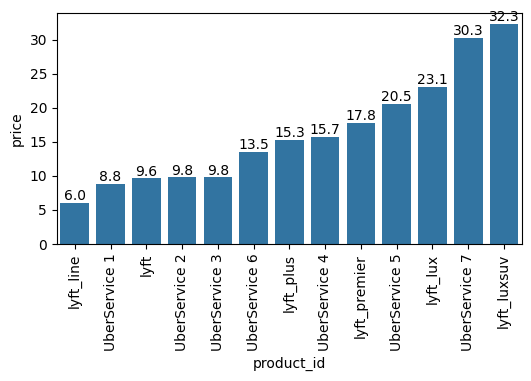

In [57]:
product_id = df4.groupby("product_id")["price"].mean().reset_index()
product_id = product_id.sort_values(by="price", ascending=True)
plt.figure(figsize=(6,3))
sn = sns.barplot(data=product_id , x = "product_id" , y="price", estimator="median")
sn.bar_label(sn.containers[0], fmt="%.1f")
plt.xticks(rotation = 90)
plt.show()

The product_id represents different categories of Uber and Lyft rides, each with a different mean price. This variation indicates that ride category impacts pricing in real-time, making it a relevant feature for price prediction.








In [58]:
df["name"].value_counts(normalize=True) * 100

name
UberXL          7.952025
UberPool        7.950580
Black SUV       7.949424
Black           7.949279
WAV             7.948123
UberX           7.946823
Taxi            7.904772
Shared          7.400744
Lux Black XL    7.400744
Lux             7.400166
Lyft            7.399444
Lux Black       7.399299
Lyft XL         7.398577
Name: proportion, dtype: float64

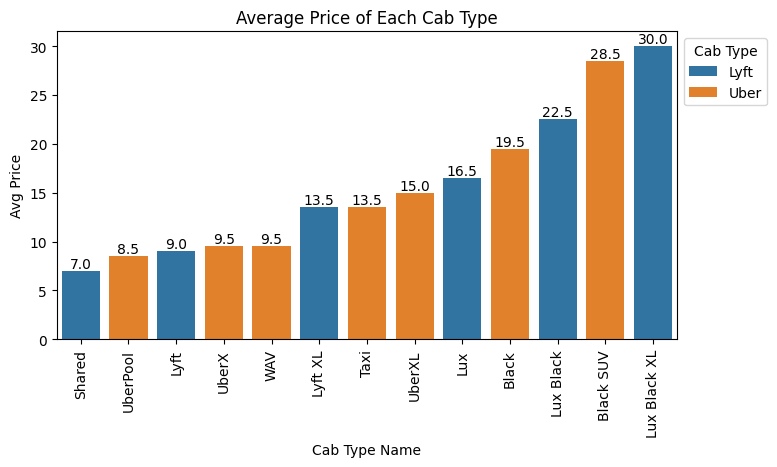

In [59]:
name = df4.groupby(["name", "cab_type"])["price"].median().reset_index()  
name = name.sort_values(by="price", ascending=True)
plt.figure(figsize=(8,4))
sn = sns.barplot(data=name, x="name", y="price", hue="cab_type")

for container in sn.containers:
    sn.bar_label(container, fmt="%.1f") 

plt.xticks(rotation=90)
plt.xlabel("Cab Type Name")
plt.ylabel("Avg Price")
plt.title("Average Price of Each Cab Type")
plt.legend(title="Cab Type", bbox_to_anchor=(1, 1))
plt.show()

We can easily see that larger cab types like Lux Black XL are booked less frequently compared to others, but their prices are higher. On the other hand, commonly used cabs have varying fares depending on their properties, such as size and other features and shared cabs price low with other.

In [60]:
pd.set_option('display.max_columns', None)  
df4.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  temperature  \
0     lyft_line        Shared    5.0      0.44               1.0        42.34   
1  lyft_premier           Lux   11.0      0.44               1.0        43.58   
2          lyft          Lyft    7.0      0.44               1.0        38.33   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0        34.38   
4     lyft_plus       Lyft XL    9.0      0.44               1.0        37.44   

   apparentTemperature    short_summary  \
0                37.12   Mostly Cloudy    
1                37.35            Rain    
2                32.93           Clear    
3                29.63           Clear    
4                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   
1     41.83   1003.97           90        1.00        0  291.1   1543232969   
2     31.10    992.28          240        0.03        0  315.7   1543319437   
3     26.64   1013.73          310        0.00        0  291.1   1543492370   
4     28.61    998.36          303        0.44        0  347.7   1543405904   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1544994864       0.30       

In [61]:
df4["short_summary"].value_counts()

short_summary
Overcast             218587
Mostly Cloudy        145997
Partly Cloudy        127035
Clear                 87024
Light Rain            54805
Rain                  23649
Possible Drizzle      18599
Foggy                  9044
Drizzle                7285
Name: count, dtype: int64

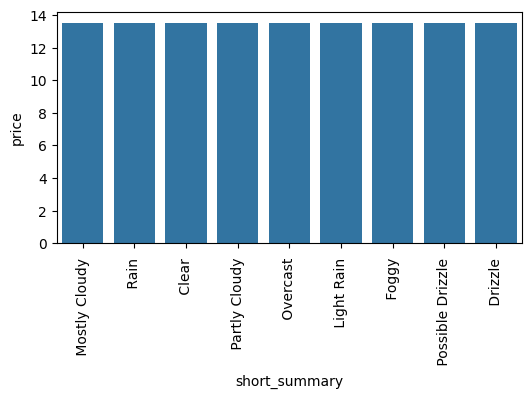

In [62]:
plt.figure(figsize=(6,3))
sns.barplot(data=df4 , x="short_summary", y="price" , estimator="median")
plt.xticks(rotation=90)
plt.show()

In [63]:
df["long_summary"].value_counts()

long_summary
Mostly cloudy throughout the day.                      201964
Partly cloudy throughout the day.                      145149
Light rain in the morning.                             102285
Rain throughout the day.                                54234
Light rain in the morning and overnight.                50497
Rain until morning, starting again in the evening.      47788
Foggy in the morning.                                   44724
Light rain until evening.                               35526
Overcast throughout the day.                             7483
Possible drizzle in the morning.                         1871
Rain in the morning and afternoon.                        504
Name: count, dtype: int64

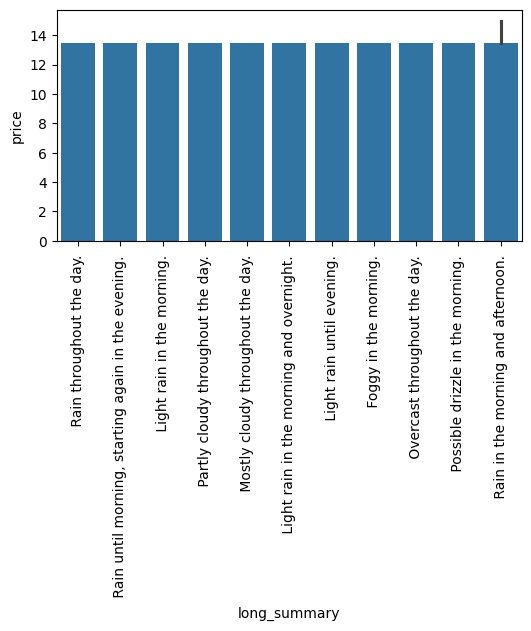

In [64]:
plt.figure(figsize=(6,3))
sns.barplot(data=df4 , x="long_summary", y="price" , estimator="median")
plt.xticks(rotation=90)
plt.show()

Both summaries do not significantly contribute to price variation. Every category has nearly the same price, with the long summary having a slightly high price in one case, but the difference is minimal. To optimize, we will retain the long summary and trim it to 1-2 words while dropping the short summary, as both convey the same meaning

In [65]:
df4["long_summary"] = df4["long_summary"].str.split().str[:2].str.join(" ")

In [66]:
df4["long_summary"].value_counts()

long_summary
Mostly cloudy          201964
Light rain             188308
Partly cloudy          145149
Rain throughout         54234
Rain until              47788
Foggy in                44724
Overcast throughout      7483
Possible drizzle         1871
Rain in                   504
Name: count, dtype: int64

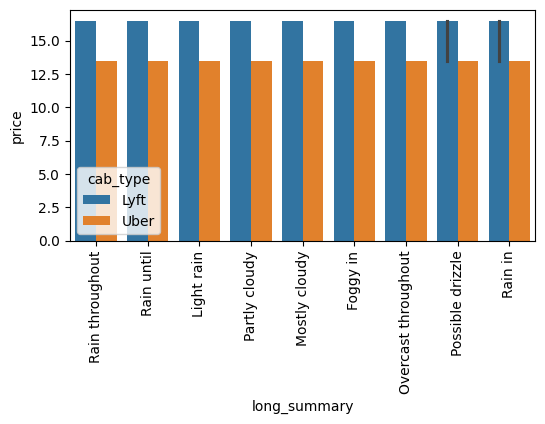

In [67]:
plt.figure(figsize=(6,3))
sns.barplot(data=df4 , x="long_summary", y="price"  , hue ="cab_type", estimator="median")
plt.xticks(rotation=90)
plt.show()

In [68]:
df5 = df4.drop(columns="short_summary")

In [69]:
df5.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  temperature  \
0     lyft_line        Shared    5.0      0.44               1.0        42.34   
1  lyft_premier           Lux   11.0      0.44               1.0        43.58   
2          lyft          Lyft    7.0      0.44               1.0        38.33   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0        34.38   
4     lyft_plus       Lyft XL    9.0      0.44               1.0        37.44   

   apparentTemperature     long_summary  precipIntensity  precipProbability  \
0                37.12  Rain throughout           0.0000                0.0   
1                37.35       Rain until           0.1299                1.0   
2                32.93       Light rain           0.0000                0.0   
3                29.63    Partly cloudy           0.0000                0.0   
4                30.88    Mostly cloudy           0.0000                0.0   

   humidity  windSpeed  windGust  windGustTime  visibility  temperatureHigh  \
0      0.68       8.66      9.17    1545015600      10.000            43.68   
1      0.94      11.98     11.98    1543291200       4.786            47.30   
2      0.75       7.33      7.33    1543334400      10.000            47.55   
3      0.73       5.28      5.28    1543514400      10.000            45.03   
4      0.70       9.14      9.14    1543446000      10.000            42.18   

   temperatureHighTime  temperatureLow  temperatureLowTime  \
0           1544968800           34.19          1545048000   
1           1543251600           42.10          1543298400   
2           1543320000           33.10          1543402800   
3           1543510800           28.90          1543579200   
4           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   
1     41.83   1003.97           90        1.00        0  291.1   1543232969   
2     31.10    992.28          240        0.03        0  315.7   1543319437   
3     26.64   1013.73          310        0.00        0  291.1   1543492370   
4     28.61    998.36          303        0.44        0  347.7   1543405904   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1544994864       0.30              0.1276   1544979600           39.89   
1  1543266992       0.64              0.1300   1543251600           40.49   
2  1543353364       0.68              0.1064   1543338000           35.36   
3  1543526114       0.75              0.0000   1543507200           34.67   
4  1543439738       0.72              0.0001   1543420800   

icon – Weather icon representing specific conditions.


In [70]:
df5["icon"].value_counts()

icon
cloudy                  218587
partly-cloudy-night     157774
partly-cloudy-day       115258
rain                    104338
clear-night              60211
clear-day                26813
fog                       9044
Name: count, dtype: int64

In [71]:
df5["icon"].value_counts(normalize=True)* 100

icon
cloudy                  31.586576
partly-cloudy-night     22.798887
partly-cloudy-day       16.655179
rain                    15.077201
clear-night              8.700697
clear-day                3.874571
fog                      1.306889
Name: proportion, dtype: float64

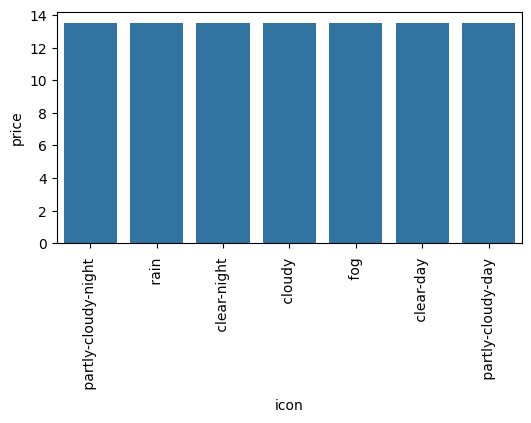

In [72]:
plt.figure(figsize=(6,3))
sns.barplot(data=df4 , x="icon", y="price" , estimator="median")
plt.xticks(rotation=90)
plt.show()

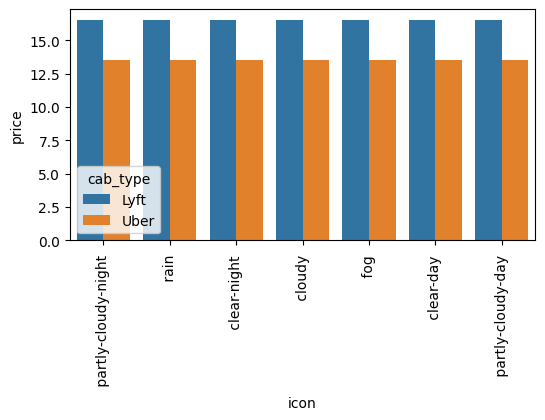

In [73]:
plt.figure(figsize=(6,3))
sns.barplot(data=df4 , x="icon", y="price"  , hue="cab_type", estimator="median")
plt.xticks(rotation=90)
plt.show()

In [74]:
df5[["icon","long_summary"]].sample(15)

icon         long_summary
597777           clear-night         Partly cloudy
582357                  rain            Light rain
68727    partly-cloudy-night         Partly cloudy
526350                cloudy         Mostly cloudy
465507                  rain            Rain until
361167                cloudy              Foggy in
241260                cloudy            Rain until
474812   partly-cloudy-night            Light rain
196367             clear-day         Partly cloudy
629645                cloudy         Mostly cloudy
94952              clear-day         Mostly cloudy
219783   partly-cloudy-night         Partly cloudy
564181                cloudy   Overcast throughout
448406                cloudy            Rain until
516790   partly-cloudy-night       Rain throughout

icon feature have also contributing the information about weather i cherked it highly the meaning of in summary weather is same so ruther then using icon we will use summary feature , this is also becuse of icon have same realtion with price with a same of 15.8 so thats why , icon and summary contributing same  

In [75]:
df6 = df5.drop(columns="long_summary")

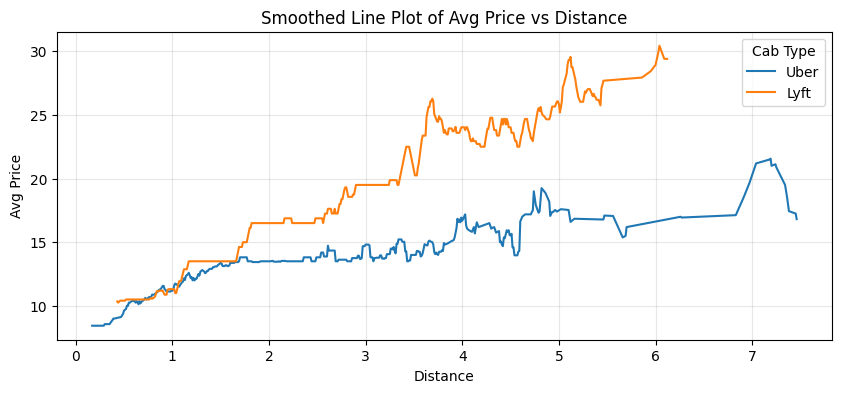

In [76]:
df_avg = df4.groupby(["distance", "cab_type"])["price"].median().reset_index()
df_avg["smoothed_price"] = df_avg.groupby("cab_type")["price"].transform(lambda x: x.rolling(window=8, center=True).mean())
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg, x="distance", y="smoothed_price", hue="cab_type", linewidth=1.5)
plt.xlabel("Distance")
plt.ylabel("Avg Price")
plt.title("Smoothed Line Plot of Avg Price vs Distance")
plt.legend(title="Cab Type")
plt.grid(alpha=0.3)
plt.show()

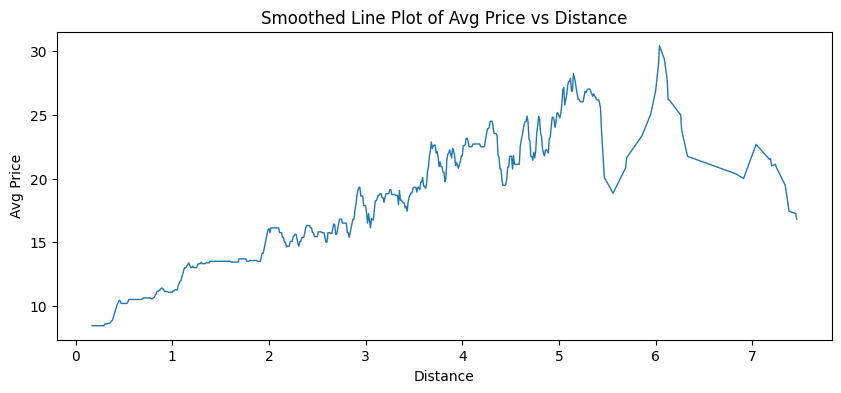

In [77]:
df_avg = df4.groupby("distance")["price"].median().reset_index()
df_avg["price"] = df_avg["price"].rolling(window=8, center=True).mean()
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg, x="distance", y="price", linewidth=1)
plt.xlabel("Distance")
plt.ylabel("Avg Price")
plt.title("Smoothed Line Plot of Avg Price vs Distance")
plt.show()

so there is a linear relation between distance and price but after increass 5.2 in distance it become variation of sort of linear because of outliers in both uber and lyft, so distance is also a good feature for model, after removing outliers it may become a good linear relation.

In [78]:
df6.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  temperature  \
0     lyft_line        Shared    5.0      0.44               1.0        42.34   
1  lyft_premier           Lux   11.0      0.44               1.0        43.58   
2          lyft          Lyft    7.0      0.44               1.0        38.33   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0        34.38   
4     lyft_plus       Lyft XL    9.0      0.44               1.0        37.44   

   apparentTemperature  precipIntensity  precipProbability  humidity  \
0                37.12           0.0000                0.0      0.68   
1                37.35           0.1299                1.0      0.94   
2                32.93           0.0000                0.0      0.75   
3                29.63           0.0000                0.0      0.73   
4                30.88           0.0000                0.0      0.70   

   windSpeed  windGust  windGustTime  visibility  temperatureHigh  \
0       8.66      9.17    1545015600      10.000            43.68   
1      11.98     11.98    1543291200       4.786            47.30   
2       7.33      7.33    1543334400      10.000            47.55   
3       5.28      5.28    1543514400      10.000            45.03   
4       9.14      9.14    1543446000      10.000            42.18   

   temperatureHighTime  temperatureLow  temperatureLowTime  \
0           1544968800           34.19          1545048000   
1           1543251600           42.10          1543298400   
2           1543320000           33.10          1543402800   
3           1543510800           28.90          1543579200   
4           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   
1     41.83   1003.97           90        1.00        0  291.1   1543232969   
2     31.10    992.28          240        0.03        0  315.7   1543319437   
3     26.64   1013.73          310        0.00        0  291.1   1543492370   
4     28.61    998.36          303        0.44        0  347.7   1543405904   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1544994864       0.30              0.1276   1544979600           39.89   
1  1543266992       0.64              0.1300   1543251600           40.49   
2  1543353364       0.68              0.1064   1543338000           35.36   
3  1543526114       0.75              0.0000   1543507200           34.67   
4  1543439738       0.72              0.0001   1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000  

In [79]:
df6["surge_multiplier"].value_counts()

surge_multiplier
1.00    671050
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

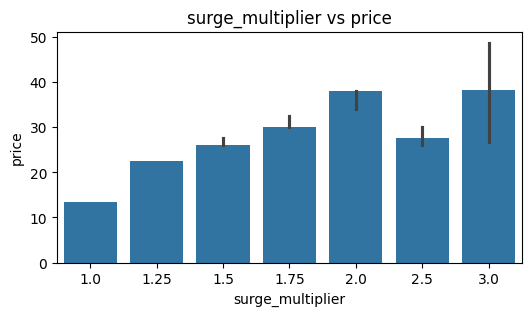

In [80]:
plt.figure(figsize=(6,3))
sns.barplot(data=df6 , x="surge_multiplier",y ="price" , estimator="median")
plt.ylabel("price")
plt.xlabel("surge_multiplier")
plt.title("surge_multiplier vs price")
plt.show()

my analysis show in surge_multiplier with avg prices of each multipler every surge_multiplier have diff avg price 

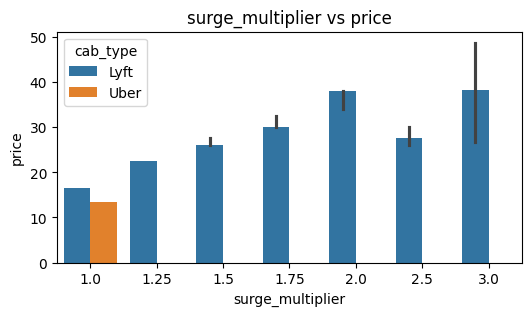

In [81]:
plt.figure(figsize=(6,3))
sns.barplot(data=df6 , x="surge_multiplier",y ="price" ,hue = "cab_type", estimator="median")
plt.ylabel("price")
plt.xlabel("surge_multiplier")
plt.title("surge_multiplier vs price")
plt.show()

then i see in cab_types with this only lyft do high surge_multiplier than 1.0 and also in 1.0 , but uber only present in 1.0 which means uber take surge only 1.0 

In [82]:
df6.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  temperature  \
0     lyft_line        Shared    5.0      0.44               1.0        42.34   
1  lyft_premier           Lux   11.0      0.44               1.0        43.58   
2          lyft          Lyft    7.0      0.44               1.0        38.33   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0        34.38   
4     lyft_plus       Lyft XL    9.0      0.44               1.0        37.44   

   apparentTemperature  precipIntensity  precipProbability  humidity  \
0                37.12           0.0000                0.0      0.68   
1                37.35           0.1299                1.0      0.94   
2                32.93           0.0000                0.0      0.75   
3                29.63           0.0000                0.0      0.73   
4                30.88           0.0000                0.0      0.70   

   windSpeed  windGust  windGustTime  visibility  temperatureHigh  \
0       8.66      9.17    1545015600      10.000            43.68   
1      11.98     11.98    1543291200       4.786            47.30   
2       7.33      7.33    1543334400      10.000            47.55   
3       5.28      5.28    1543514400      10.000            45.03   
4       9.14      9.14    1543446000      10.000            42.18   

   temperatureHighTime  temperatureLow  temperatureLowTime  \
0           1544968800           34.19          1545048000   
1           1543251600           42.10          1543298400   
2           1543320000           33.10          1543402800   
3           1543510800           28.90          1543579200   
4           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   
1     41.83   1003.97           90        1.00        0  291.1   1543232969   
2     31.10    992.28          240        0.03        0  315.7   1543319437   
3     26.64   1013.73          310        0.00        0  291.1   1543492370   
4     28.61    998.36          303        0.44        0  347.7   1543405904   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  temperatureMin  \
0  1544994864       0.30              0.1276   1544979600           39.89   
1  1543266992       0.64              0.1300   1543251600           40.49   
2  1543353364       0.68              0.1064   1543338000           35.36   
3  1543526114       0.75              0.0000   1543507200           34.67   
4  1543439738       0.72              0.0001   1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000  

there are to much columns about the Temperature frist i will check the relation between with price 

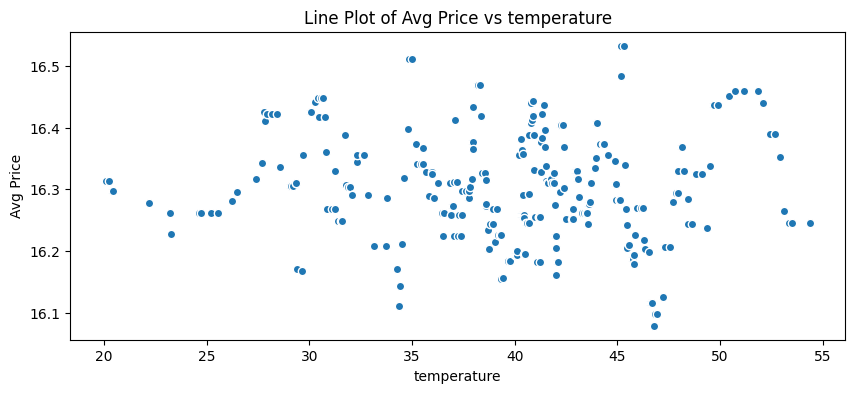

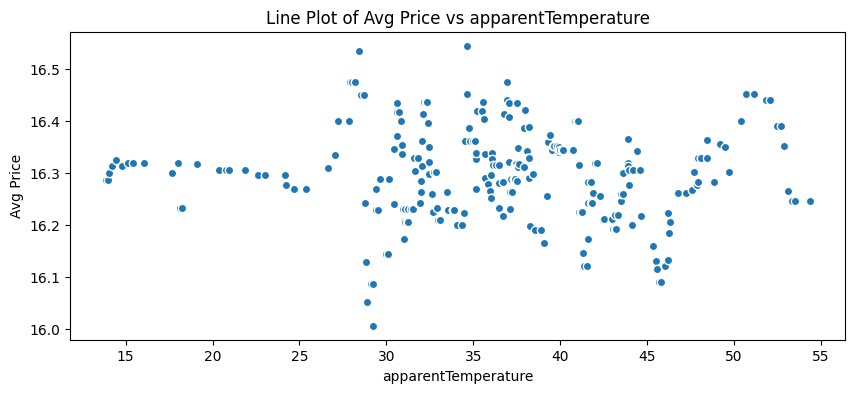

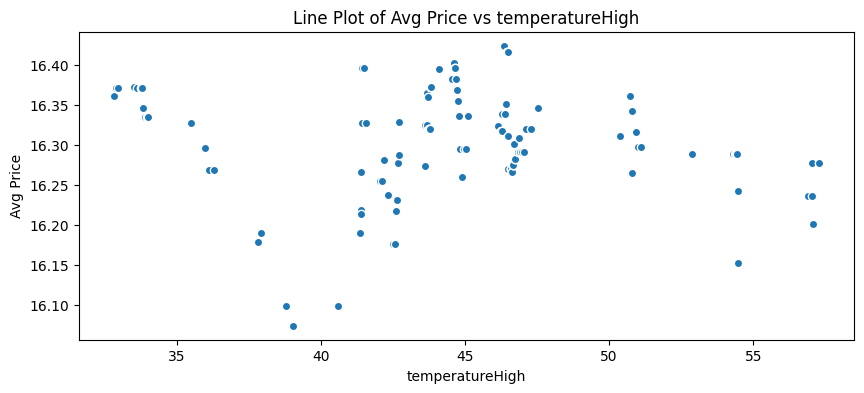

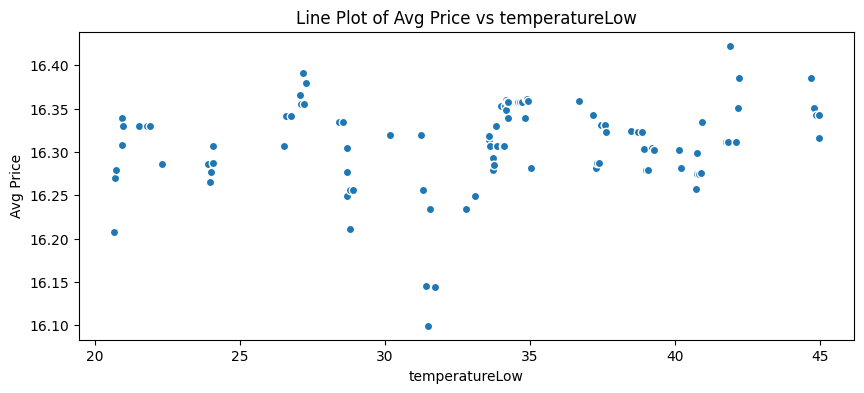

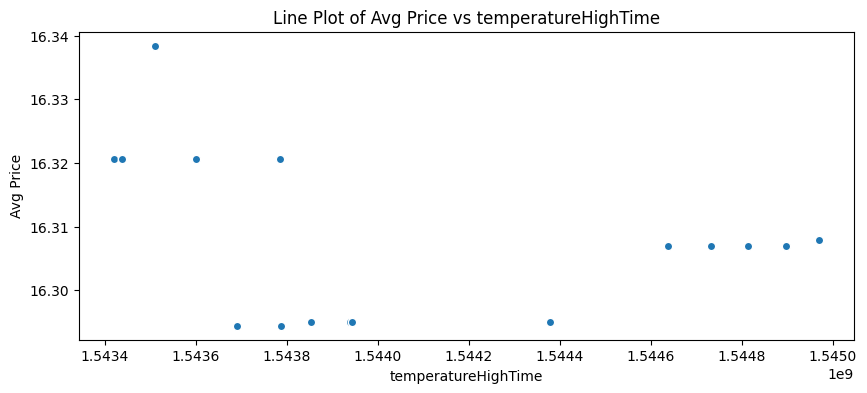

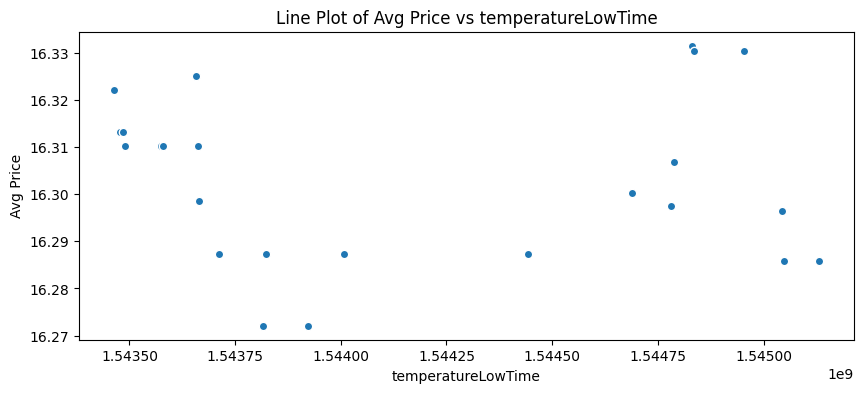

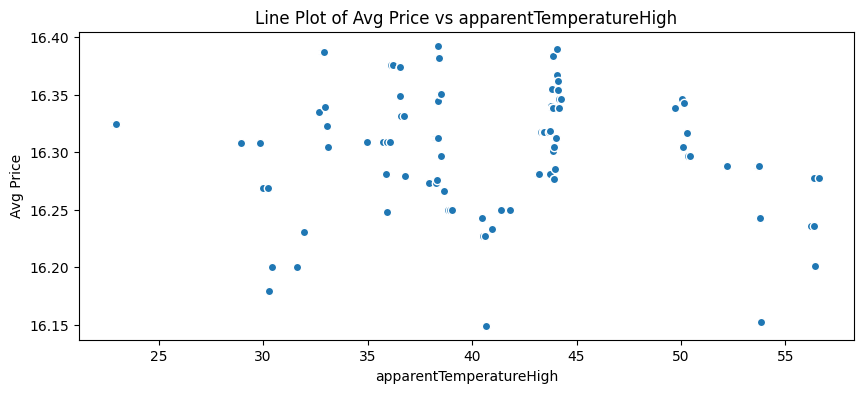

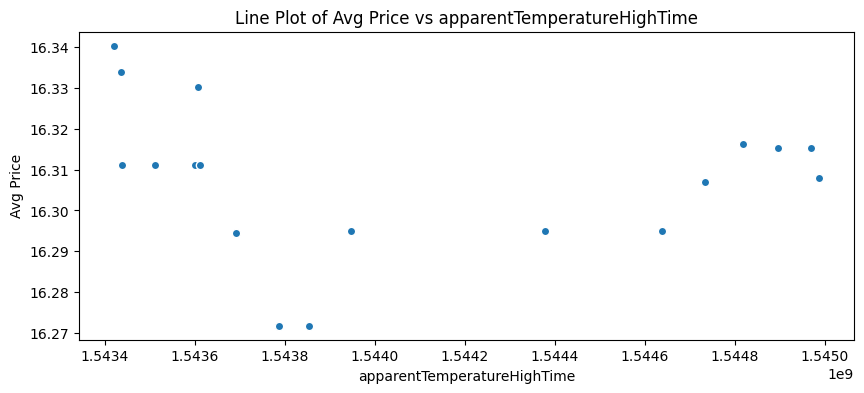

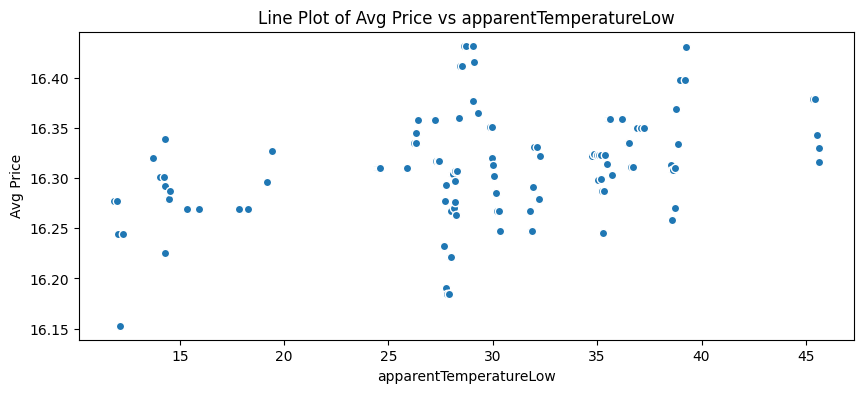

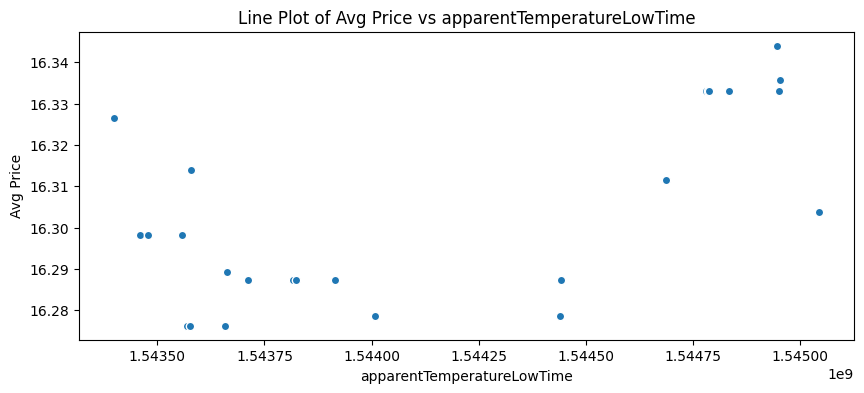

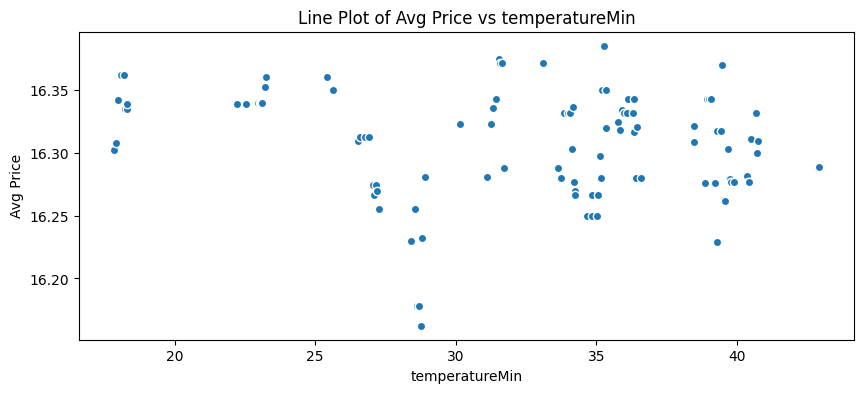

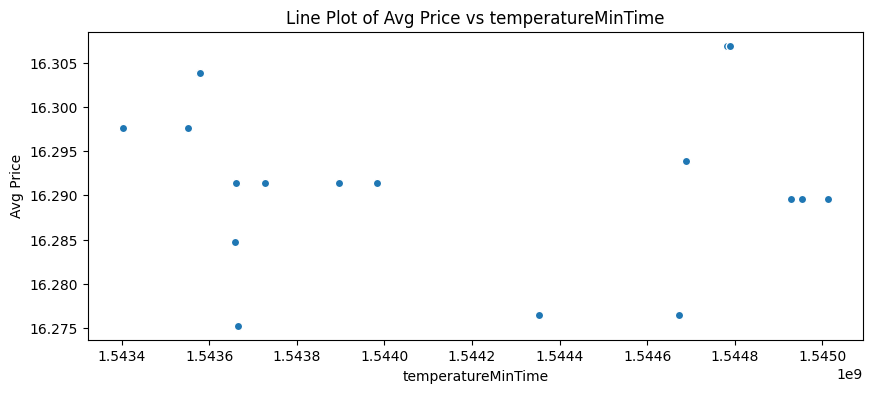

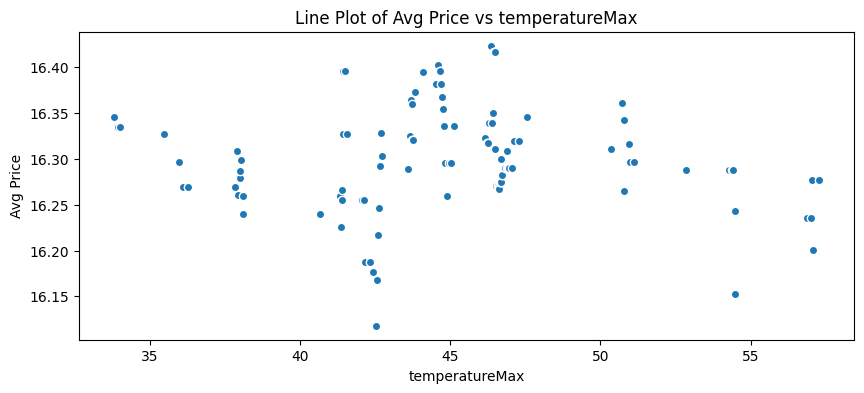

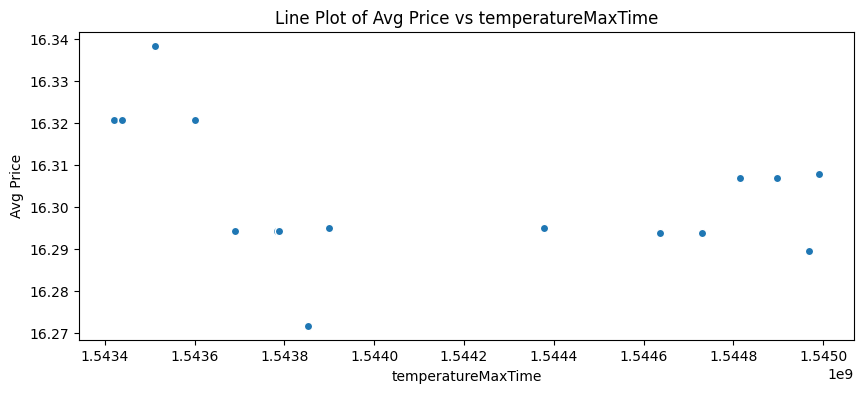

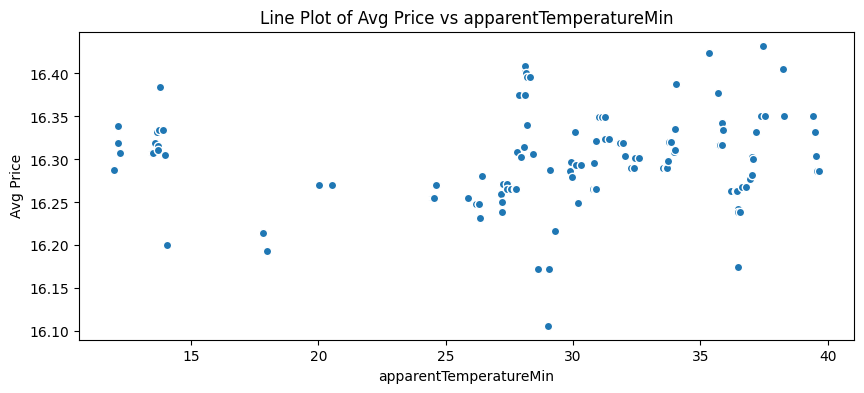

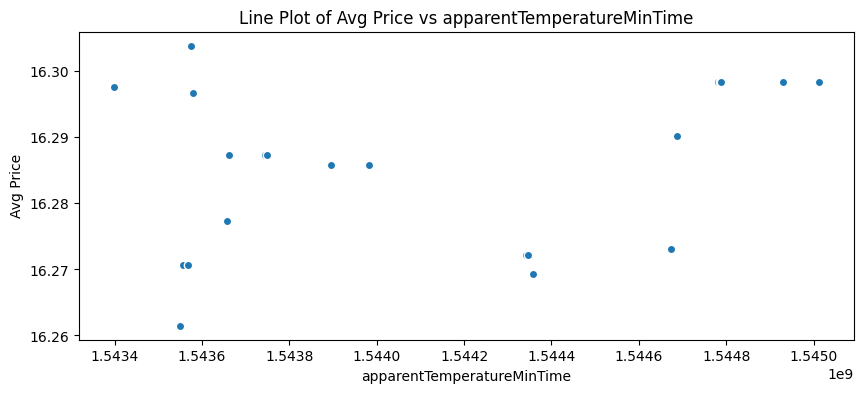

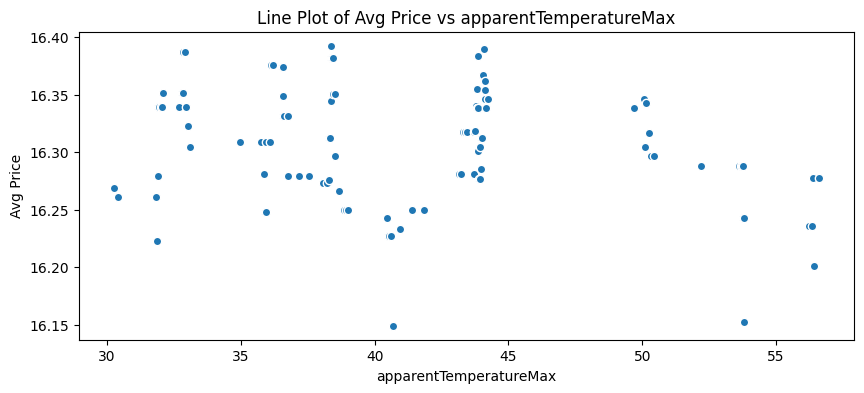

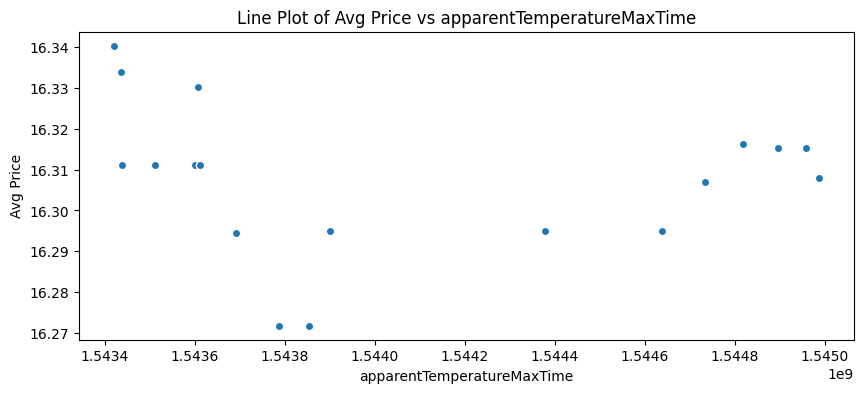

In [83]:
temp_columns = [
    "temperature", "apparentTemperature", "temperatureHigh", "temperatureLow",
    "temperatureHighTime", "temperatureLowTime", "apparentTemperatureHigh", 
    "apparentTemperatureHighTime", "apparentTemperatureLow", "apparentTemperatureLowTime",
    "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
    "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax",
    "apparentTemperatureMaxTime"
]

for col in temp_columns:
    if col in df4.columns:  # Ensure column exists in DataFrame
        df_avg = df4.groupby(col)["price"].mean().reset_index()
        df_avg["price"] = df_avg["price"].rolling(window=8, center=True).median()
        plt.figure(figsize=(10, 4))
        sns.scatterplot(data=df_avg, x=col, y="price", linewidth=1)
        plt.xlabel(col)
        plt.ylabel("Avg Price")
        plt.title(f"Line Plot of Avg Price vs {col}")
        plt.show()

In [84]:
df4[temp_columns + ["price"]].corr()["price"]

temperature                   -0.000182
apparentTemperature           -0.000326
temperatureHigh               -0.000593
temperatureLow                 0.000106
temperatureHighTime            0.000569
temperatureLowTime             0.000567
apparentTemperatureHigh       -0.000355
apparentTemperatureHighTime    0.000553
apparentTemperatureLow         0.000717
apparentTemperatureLowTime     0.000574
temperatureMin                -0.000471
temperatureMinTime             0.000583
temperatureMax                -0.000633
temperatureMaxTime             0.000576
apparentTemperatureMin        -0.000630
apparentTemperatureMinTime     0.000619
apparentTemperatureMax        -0.000395
apparentTemperatureMaxTime     0.000558
price                          1.000000
Name: price, dtype: float64

mostly in every Temperature columns there is no relation with price and i also check the co-relation with sone columns are negative and some have minimal positive , now i will check the multicollinearited are not 

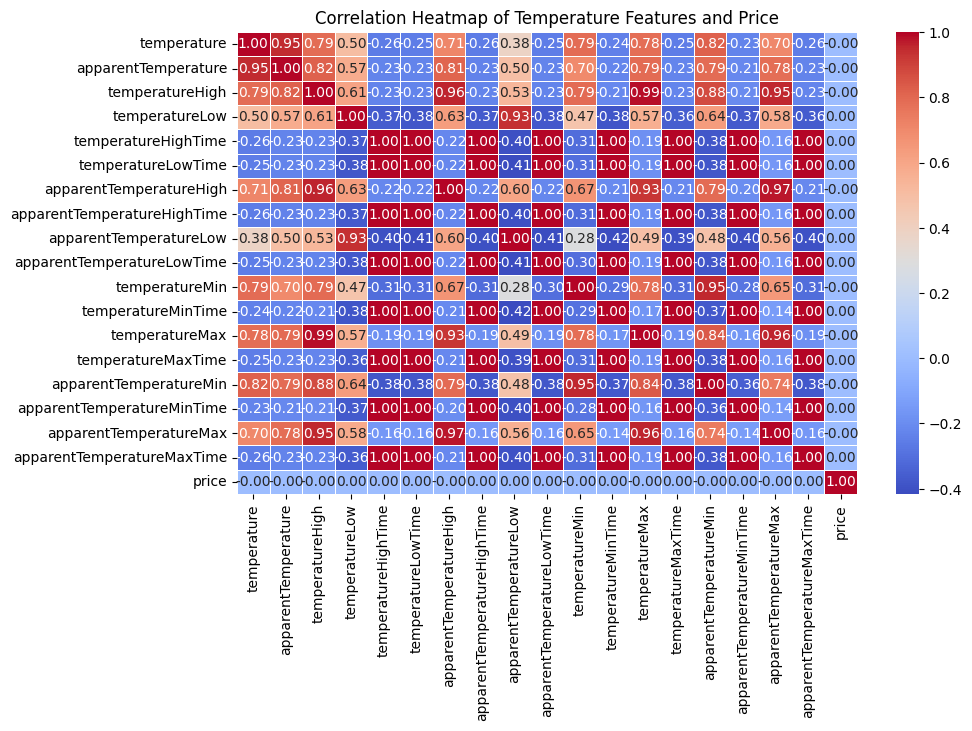

In [85]:
plt.figure(figsize=(10, 6))
sns.heatmap(df4[temp_columns + ["price"]].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Temperature Features and Price")
plt.show()

Most of the temperature-related columns exhibit multicollinearity. Therefore, we need to drop those with a correlation greater than 75%.

In [86]:
df7 = df6.drop(columns=["temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                  "apparentTemperatureMin", "apparentTemperatureMinTime", 
                  "apparentTemperatureMax", "apparentTemperatureMaxTime"])

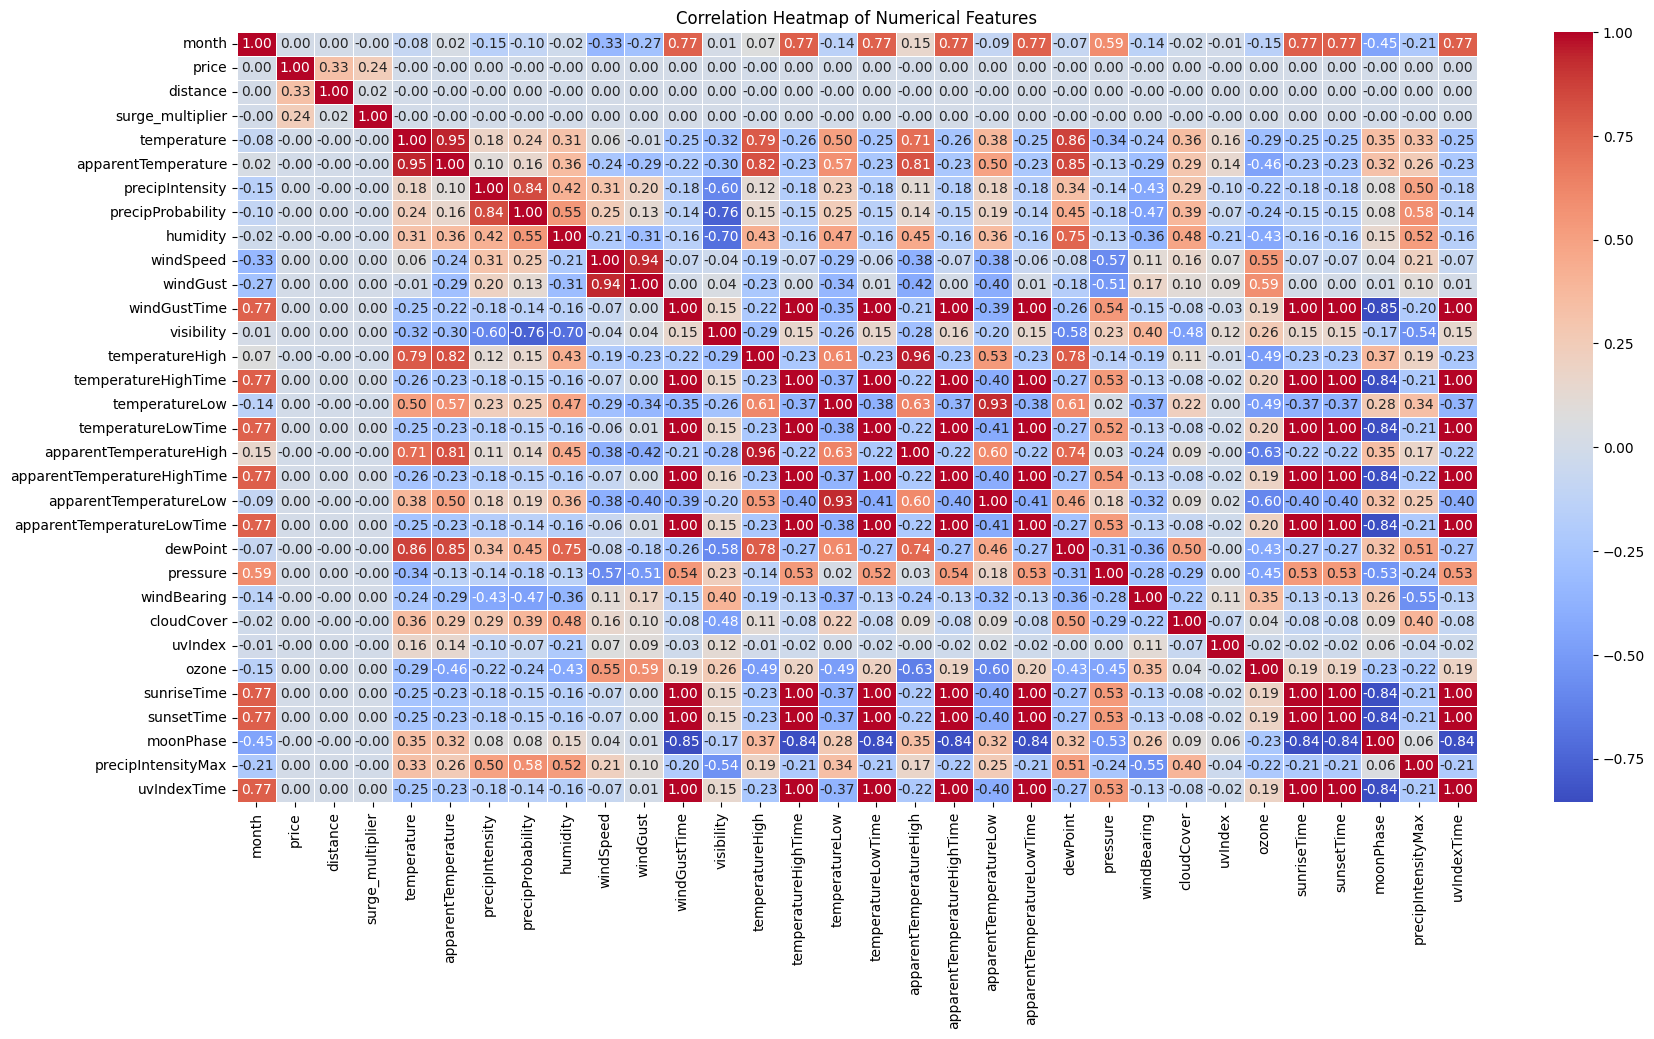

In [87]:
num_cols = df7.select_dtypes(include=["number"]) 

plt.figure(figsize=(20,10))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [88]:
drop_cols = ["temperature", "temperatureHigh", "temperatureHighTime", 
             "temperatureLowTime","apparentTemperatureHighTime", "apparentTemperatureLowTime"]

df8 = df7.drop(columns=drop_cols)

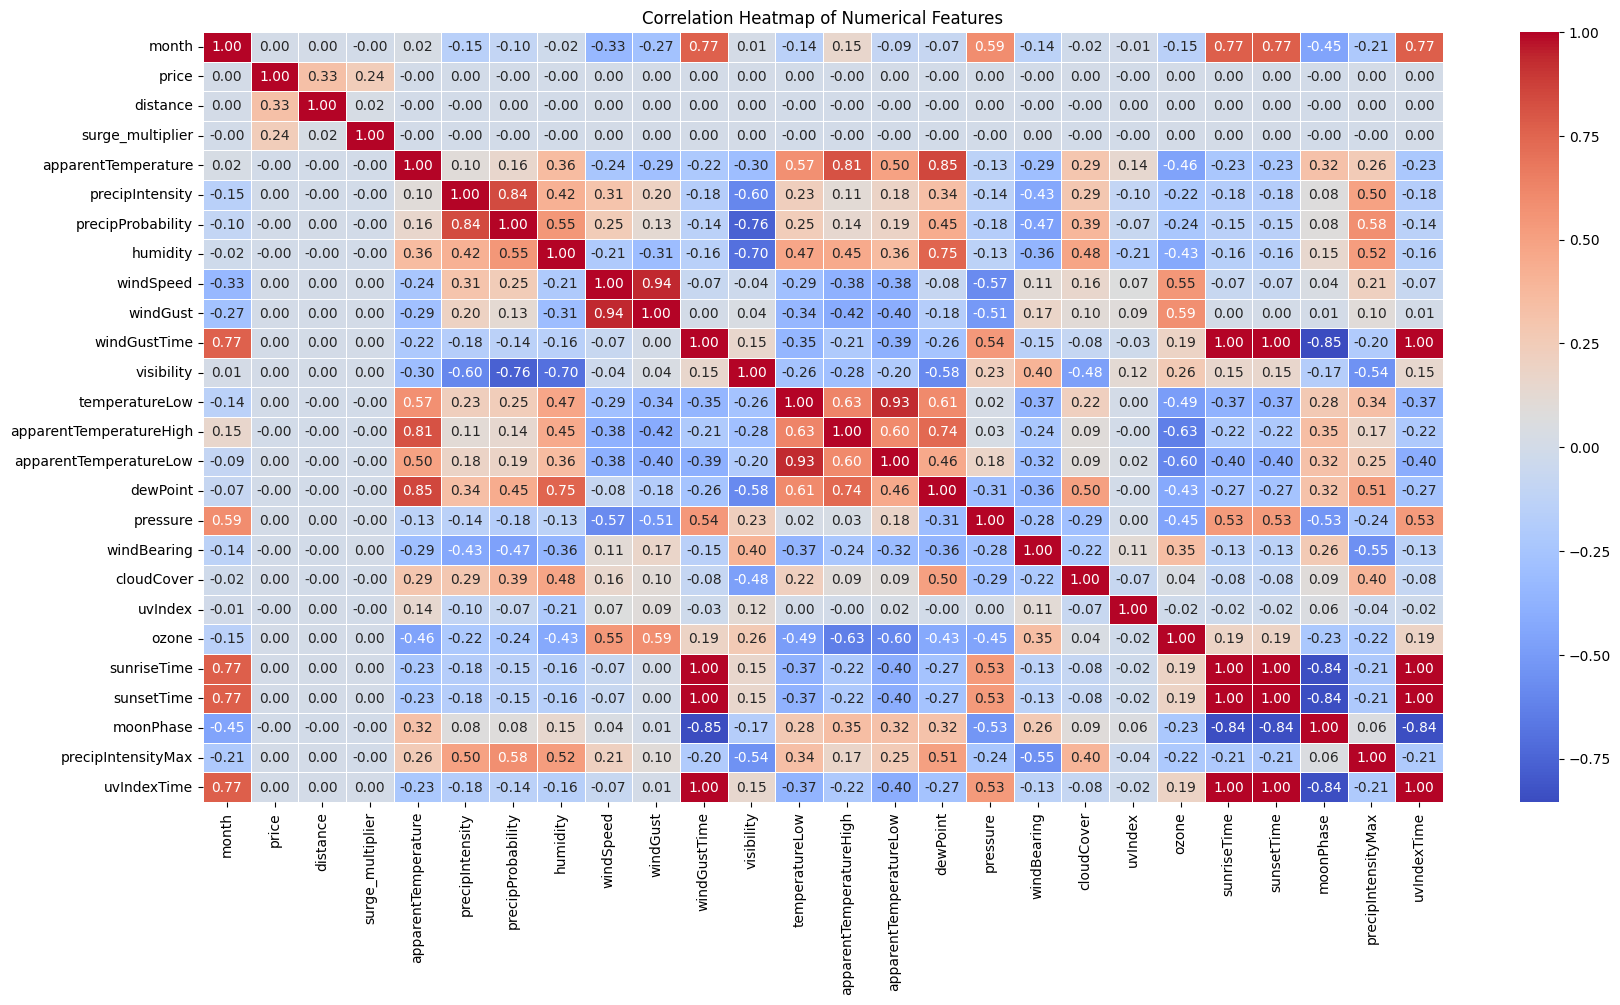

In [89]:
num_cols = df8.select_dtypes(include=["number"]) 

plt.figure(figsize=(20,10))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

Some columns, apart from temperature-related ones and some temperaturecols, also have multicollinearity. To handle this, we will check multicollinearity among independent variables. If two columns are highly correlated (above 75%), we will compare their correlation with price and drop the one with the lower correlation.

In [90]:
df8.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  \
0     lyft_line        Shared    5.0      0.44               1.0   
1  lyft_premier           Lux   11.0      0.44               1.0   
2          lyft          Lyft    7.0      0.44               1.0   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     lyft_plus       Lyft XL    9.0      0.44               1.0   

   apparentTemperature  precipIntensity  precipProbability  humidity  \
0                37.12           0.0000                0.0      0.68   
1                37.35           0.1299                1.0      0.94   
2                32.93           0.0000                0.0      0.75   
3                29.63           0.0000                0.0      0.73   
4                30.88           0.0000                0.0      0.70   

   windSpeed  windGust  windGustTime  visibility  temperatureLow  \
0       8.66      9.17    1545015600      10.000           34.19   
1      11.98     11.98    1543291200       4.786           42.10   
2       7.33      7.33    1543334400      10.000           33.10   
3       5.28      5.28    1543514400      10.000           28.90   
4       9.14      9.14    1543446000      10.000           36.71   

   apparentTemperatureHigh  apparentTemperatureLow                   icon  \
0                    37.95                   27.39   partly-cloudy-night    
1                    43.92                   36.20                  rain    
2                    44.12                   29.11           clear-night    
3                    38.53                   26.20           clear-night    
4                    35.75                   30.29   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   
1     41.83   1003.97           90        1.00        0  291.1   1543232969   
2     31.10    992.28          240        0.03        0  315.7   1543319437   
3     26.64   1013.73          310        0.00        0  291.1   1543492370   
4     28.61    998.36          303        0.44        0  347.7   1543405904   

   sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  
0  1544994864       0.30              0.1276   1544979600  
1  1543266992       0.64              0.1300   1543251600  
2  1543353364       0.68              0.1064   1543338000  
3  1543526114       0.75              0.0000   1543507200  
4  1543439738       0.72              0.0001   1543420800

In [91]:
num_cols = df8.select_dtypes(include=["number"]) 
num_cols.corr()

month     price  distance  surge_multiplier  \
month                    1.000000  0.000657  0.002221         -0.000724   
price                    0.000657  1.000000  0.328691          0.243340   
distance                 0.002221  0.328691  1.000000          0.024738   
surge_multiplier        -0.000724  0.243340  0.024738          1.000000   
apparentTemperature      0.024998 -0.000326 -0.003091         -0.002531   
precipIntensity         -0.154407  0.000074 -0.000263         -0.001500   
precipProbability       -0.097831 -0.000315  0.000343         -0.002734   
humidity                -0.022039 -0.001322 -0.003893         -0.001649   
windSpeed               -0.334651  0.001069  0.002294          0.002545   
windGust                -0.270404  0.001263  0.001396          0.002109   
windGustTime             0.767136  0.000655  0.003518          0.000358   
visibility               0.011324  0.001551  0.004052          0.001691   
temperatureLow          -0.138421  0.000106 -0.002082         -0.002560   
apparentTemperatureHigh  0.152590 -0.000355 -0.004054         -0.002053   
apparentTemperatureLow  -0.086824  0.000717 -0.001434         -0.002973   
dewPoint                -0.074624 -0.000728 -0.004047         -0.001824   
pressure                 0.589402  0.000619  0.003384         -0.003087   
windBearing             -0.135194 -0.001153 -0.002174          0.002149   
cloudCover              -0.016544  0.000644 -0.000884         -0.002081   
uvIndex                 -0.012285 -0.000339  0.002299         -0.002449   
ozone                   -0.149095  0.000536  0.001492          0.003362   
sunriseTime              0.770553  0.000572  0.003453          0.000462   
sunsetTime               0.770516  0.000572  0.003453          0.000462   
moonPhase               -0.452402 -0.001442 -0.004525         -0.000113   
precipIntensityMax      -0.212899  0.001057  0.000694         -0.000054   
uvIndexTime              0.770636  0.000575  0.003459          0.000462   

                         apparentTemperature  precipIntensity  \
month                               0.024998        -0.154407   
price                              -0.000326         0.000074   
distance                           -0.003091        -0.000263   
surge_multiplier                   -0.002531        -0.001500   
apparentTemperature                 1.000000         0.098237   
precipIntensity                     0.098237         1.000000   
precipProbability                   0.158634         0.838485   
humidity                            0.356437         0.417472   
windSpeed                          -0.244570         0.307271   
windGust                           -0.287579         0.198022   
windGustTime                       -0.223642        -0.175150   
visibility                         -0.299157        -0.600631   
temperatureLow                      0.574106         0.231720   
apparentTemperatureHigh             0.811803         0.114495   
apparentTemperatureLow              0.495928         0.183096   
dewPoint                            0.849748         0.338640   
pressure                           -0.134599        -0.143761   
windBearing                        -0.293614        -0.433233   
cloudCover                          0.294763         0.288905   
uvIndex                             0.138394        -0.099016   
ozone                              -0.462477        -0.222132   
sunriseTime                        -0.231694        -0.180810   
sunsetTime                         -0.231714        -0.180789   
moonPhase                           0.324324         0.077846   
precipIntensityMax                  0.256954         0.498783   
uvIndexTime                        -0.231339        -0.180096   

                         precipProbability  humidity  windSpeed  windGust  \
month                            -0.097831 -0.022039  -0.334651 -0.270404   
price                            -0.000315 -0.001322   0.001069  0.001263   
distance       

In [92]:
drop_cols = ["windGustTime", "dewPoint", "sunriseTime", "sunsetTime","apparentTemperature",
             "uvIndexTime", "windGust", "precipProbability" , "temperatureLow"]

df9 = df8.drop(columns=drop_cols)

In [93]:
df9.head()

hour        day  month            source    destination cab_type  \
0  Medium  Mediumday     12  Haymarket Square  North Station     Lyft   
1  Medium  Mediumday     11  Haymarket Square  North Station     Lyft   
2  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
3  Medium     Lowday     11  Haymarket Square  North Station     Lyft   
4  Medium     Lowday     11  Haymarket Square  North Station     Lyft   

     product_id          name  price  distance  surge_multiplier  \
0     lyft_line        Shared    5.0      0.44               1.0   
1  lyft_premier           Lux   11.0      0.44               1.0   
2          lyft          Lyft    7.0      0.44               1.0   
3   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     lyft_plus       Lyft XL    9.0      0.44               1.0   

   precipIntensity  humidity  windSpeed  visibility  apparentTemperatureHigh  \
0           0.0000      0.68       8.66      10.000                    37.95   
1           0.1299      0.94      11.98       4.786                    43.92   
2           0.0000      0.75       7.33      10.000                    44.12   
3           0.0000      0.73       5.28      10.000                    38.53   
4           0.0000      0.70       9.14      10.000                    35.75   

   apparentTemperatureLow                   icon  pressure  windBearing  \
0                   27.39   partly-cloudy-night    1021.98           57   
1                   36.20                  rain    1003.97           90   
2                   29.11           clear-night     992.28          240   
3                   26.20           clear-night    1013.73          310   
4                   30.29   partly-cloudy-night     998.36          303   

   cloudCover  uvIndex  ozone  moonPhase  precipIntensityMax  
0        0.72        0  303.8       0.30              0.1276  
1        1.00        0  291.1       0.64              0.1300  
2        0.03        0  315.7       0.68              0.1064  
3        0.00        0  291.1       0.75              0.0000  
4        0.44        0  347.7       0.72              0.0001

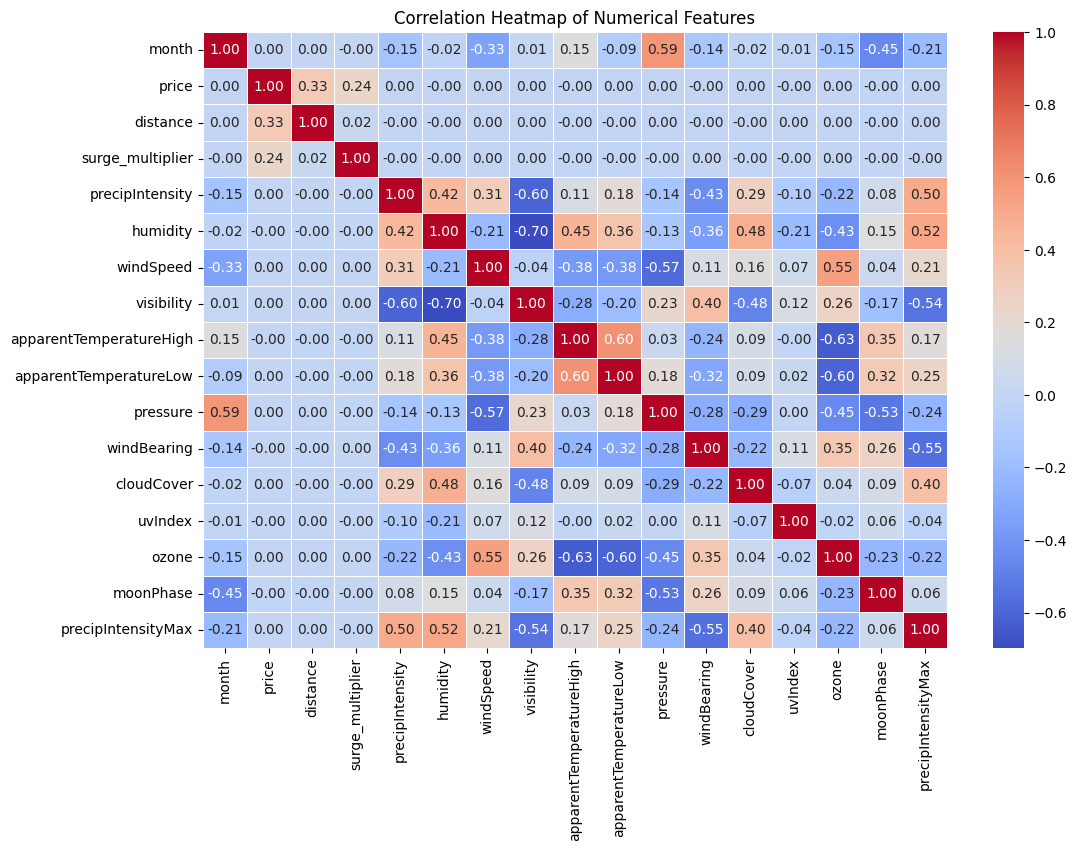

In [94]:
num_cols = df9.select_dtypes(include=["number"]) 
plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

now i have those columns which dont do multicollinearity and there impact with price is minimal but they have contribution in model too.

I will now perform feature engineering by scaling the numeric columns to bring them to a common scale, ensuring the model generalizes well. For categorical columns, I will use Label Encoding if they are nominal; otherwise, I will apply One-Hot Encoding.








In [95]:
df9.sample(5)

hour        day  month                   source       destination  \
28111     Peak  Mediumday     12       Financial District  Haymarket Square   
581197    Peak  Mediumday     11         Haymarket Square       Beacon Hill   
319076     Low     Lowday     11                   Fenway          West End   
60747   Medium    Peakday     12            North Station  Haymarket Square   
457707    Peak    Peakday     12  Northeastern University          West End   

       cab_type     product_id          name  price  distance  \
28111      Lyft   lyft_premier           Lux   13.5      1.24   
581197     Uber  UberService 6          Taxi   13.5      1.04   
319076     Uber  UberService 2           WAV   15.0      2.72   
60747      Lyft    lyft_luxsuv  Lux Black XL   26.0      0.73   
457707     Lyft       lyft_lux     Lux Black   27.5      2.83   

        surge_multiplier  precipIntensity  humidity  windSpeed  visibility  \
28111                1.0           0.1044      0.90       8.29       2.825   
581197               1.0           0.0624      0.93       6.87       2.686   
319076               1.0           0.0000      0.85       2.25       9.864   
60747                1.0           0.0000      0.71       2.29       9.724   
457707               1.0           0.0000      0.66       2.94       9.831   

        apparentTemperatureHigh  apparentTemperatureLow  \
28111                     38.39                   28.43   
581197                    44.01                   30.19   
319076                    40.69                   27.80   
60747                     44.13                   35.32   
457707                    32.85                   24.61   

                         icon  pressure  windBearing  cloudCover  uvIndex  \
28111                   rain    1012.14           54        0.99        0   
581197                  rain     989.98           79        1.00        0   
319076           clear-night    1014.80          307        0.00        0   
60747    partly-cloudy-night    1023.38          124        0.43        0   
457707           clear-night    1031.51            2        0.03        0   

        ozone  moonPhase  precipIntensityMax  
28111   325.3       0.30              0.1254  
581197  296.2       0.68              0.1425  
319076  285.2       0.79              0.0004  
60747   271.2       0.82              0.0000  
457707  327.3       0.21              0.0001

We will apply Label Encoding to the hour , day and month columns because they have an inherent order.

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df9["hour"] = le.fit_transform(df9["hour"])
df9["month"] = le.fit_transform(df9["month"])
df9["day"] = le.fit_transform(df9["day"])

In [97]:
df9.sample()

hour  day  month         source         destination cab_type  \
333316     0    1      1  South Station  Financial District     Uber   

           product_id   name  price  distance  surge_multiplier  \
333316  UberService 5  Black   15.5      0.63               1.0   

        precipIntensity  humidity  windSpeed  visibility  \
333316              0.0      0.71       8.12        10.0   

        apparentTemperatureHigh  apparentTemperatureLow      icon  pressure  \
333316                    38.36                   28.17   cloudy     1015.0   

        windBearing  cloudCover  uvIndex  ozone  moonPhase  precipIntensityMax  
333316           71         1.0        0  322.7        0.3              0.1246

We will apply One-Hot Encoding (OHE) to the source, destination, cab_type, product_id, name, and long_summary columns because they are categorical variables without any inherent order.

In [98]:
df9= pd.get_dummies(df9, columns = ['icon','source' , 'destination','cab_type','name','product_id'])
df9.head()

hour  day  month  price  distance  surge_multiplier  precipIntensity  \
0     1    1      1    5.0      0.44               1.0           0.0000   
1     1    1      0   11.0      0.44               1.0           0.1299   
2     1    0      0    7.0      0.44               1.0           0.0000   
3     1    0      0   26.0      0.44               1.0           0.0000   
4     1    0      0    9.0      0.44               1.0           0.0000   

   humidity  windSpeed  visibility  apparentTemperatureHigh  \
0      0.68       8.66      10.000                    37.95   
1      0.94      11.98       4.786                    43.92   
2      0.75       7.33      10.000                    44.12   
3      0.73       5.28      10.000                    38.53   
4      0.70       9.14      10.000                    35.75   

   apparentTemperatureLow  pressure  windBearing  cloudCover  uvIndex  ozone  \
0                   27.39   1021.98           57        0.72        0  303.8   
1                   36.20   1003.97           90        1.00        0  291.1   
2                   29.11    992.28          240        0.03        0  315.7   
3                   26.20   1013.73          310        0.00        0  291.1   
4                   30.29    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0       0.30              0.1276             False               False   
1       0.64              0.1300             False               False   
2       0.68              0.1064             False                True   
3       0.75              0.0000             False                True   
4       0.72              0.0001             False               False   

   icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0          False       False                     False   
1          False       False                     False   
2          False       False                     False   
3          False       False                     False   
4          False       False                     False   

   icon_ partly-cloudy-night   icon_ rain   source_Back Bay  \
0                        True        False            False   
1                       False         True            False   
2                       False        False            False   
3                       False        False            False   
4                        True        False            False   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0               False                     False          False   
1               False                     False          False   
2               False                     False          False   
3               False                     False          False   
4               False                     False          False   

   source_Financial District  source_Haymarket Square  source_North End  \
0                      False                     True             False   
1                      False                     True             False   
2                      False                     True             False   
3                      False                     True             False   
4                      False                     True             False   

   source_North Station  source_Northeastern University  source_South Station  \
0                 False                           False                 False   
1                 False                           False                 False   
2                 False                           False                 False   
3                 False                           False                 False   
4                 False                           False                 False   

   source_Theatre District  source_West End  destination_Back Bay  \
0                    False            False                 False   
1                    False            False   

In [99]:
df9.head(5)

hour  day  month  price  distance  surge_multiplier  precipIntensity  \
0     1    1      1    5.0      0.44               1.0           0.0000   
1     1    1      0   11.0      0.44               1.0           0.1299   
2     1    0      0    7.0      0.44               1.0           0.0000   
3     1    0      0   26.0      0.44               1.0           0.0000   
4     1    0      0    9.0      0.44               1.0           0.0000   

   humidity  windSpeed  visibility  apparentTemperatureHigh  \
0      0.68       8.66      10.000                    37.95   
1      0.94      11.98       4.786                    43.92   
2      0.75       7.33      10.000                    44.12   
3      0.73       5.28      10.000                    38.53   
4      0.70       9.14      10.000                    35.75   

   apparentTemperatureLow  pressure  windBearing  cloudCover  uvIndex  ozone  \
0                   27.39   1021.98           57        0.72        0  303.8   
1                   36.20   1003.97           90        1.00        0  291.1   
2                   29.11    992.28          240        0.03        0  315.7   
3                   26.20   1013.73          310        0.00        0  291.1   
4                   30.29    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0       0.30              0.1276             False               False   
1       0.64              0.1300             False               False   
2       0.68              0.1064             False                True   
3       0.75              0.0000             False                True   
4       0.72              0.0001             False               False   

   icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0          False       False                     False   
1          False       False                     False   
2          False       False                     False   
3          False       False                     False   
4          False       False                     False   

   icon_ partly-cloudy-night   icon_ rain   source_Back Bay  \
0                        True        False            False   
1                       False         True            False   
2                       False        False            False   
3                       False        False            False   
4                        True        False            False   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0               False                     False          False   
1               False                     False          False   
2               False                     False          False   
3               False                     False          False   
4               False                     False          False   

   source_Financial District  source_Haymarket Square  source_North End  \
0                      False                     True             False   
1                      False                     True             False   
2                      False                     True             False   
3                      False                     True             False   
4                      False                     True             False   

   source_North Station  source_Northeastern University  source_South Station  \
0                 False                           False                 False   
1                 False                           False                 False   
2                 False                           False                 False   
3                 False                           False                 False   
4                 False                           False                 False   

   source_Theatre District  source_West End  destination_Back Bay  \
0                    False            False                 False   
1                    False            False   

In [100]:
df9 = df9.replace({True:1,False:0})
df9.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10132\3860976157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df9 = df9.replace({True:1,False:0})


hour  day  month  price  distance  surge_multiplier  precipIntensity  \
0     1    1      1    5.0      0.44               1.0           0.0000   
1     1    1      0   11.0      0.44               1.0           0.1299   
2     1    0      0    7.0      0.44               1.0           0.0000   
3     1    0      0   26.0      0.44               1.0           0.0000   
4     1    0      0    9.0      0.44               1.0           0.0000   

   humidity  windSpeed  visibility  apparentTemperatureHigh  \
0      0.68       8.66      10.000                    37.95   
1      0.94      11.98       4.786                    43.92   
2      0.75       7.33      10.000                    44.12   
3      0.73       5.28      10.000                    38.53   
4      0.70       9.14      10.000                    35.75   

   apparentTemperatureLow  pressure  windBearing  cloudCover  uvIndex  ozone  \
0                   27.39   1021.98           57        0.72        0  303.8   
1                   36.20   1003.97           90        1.00        0  291.1   
2                   29.11    992.28          240        0.03        0  315.7   
3                   26.20   1013.73          310        0.00        0  291.1   
4                   30.29    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0       0.30              0.1276                 0                   0   
1       0.64              0.1300                 0                   0   
2       0.68              0.1064                 0                   1   
3       0.75              0.0000                 0                   1   
4       0.72              0.0001                 0                   0   

   icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0              0           0                         0   
1              0           0                         0   
2              0           0                         0   
3              0           0                         0   
4              0           0                         0   

   icon_ partly-cloudy-night   icon_ rain   source_Back Bay  \
0                           1            0                0   
1                           0            1                0   
2                           0            0                0   
3                           0            0                0   
4                           1            0                0   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0                   0                         0              0   
1                   0                         0              0   
2                   0                         0              0   
3                   0                         0              0   
4                   0                         0              0   

   source_Financial District  source_Haymarket Square  source_North End  \
0                          0                        1                 0   
1                          0                        1                 0   
2                          0                        1                 0   
3                          0                        1                 0   
4                          0                        1                 0   

   source_North Station  source_Northeastern University  source_South Station  \
0                     0                               0                     0   
1                     0                               0                     0   
2                     0                               0                     0   
3                     0                               0                     0   
4                     0                               0                     0   

   source_Theatre District  source_West End  destination_Back Bay  \
0                        0                0                     0   
1                        0                0   

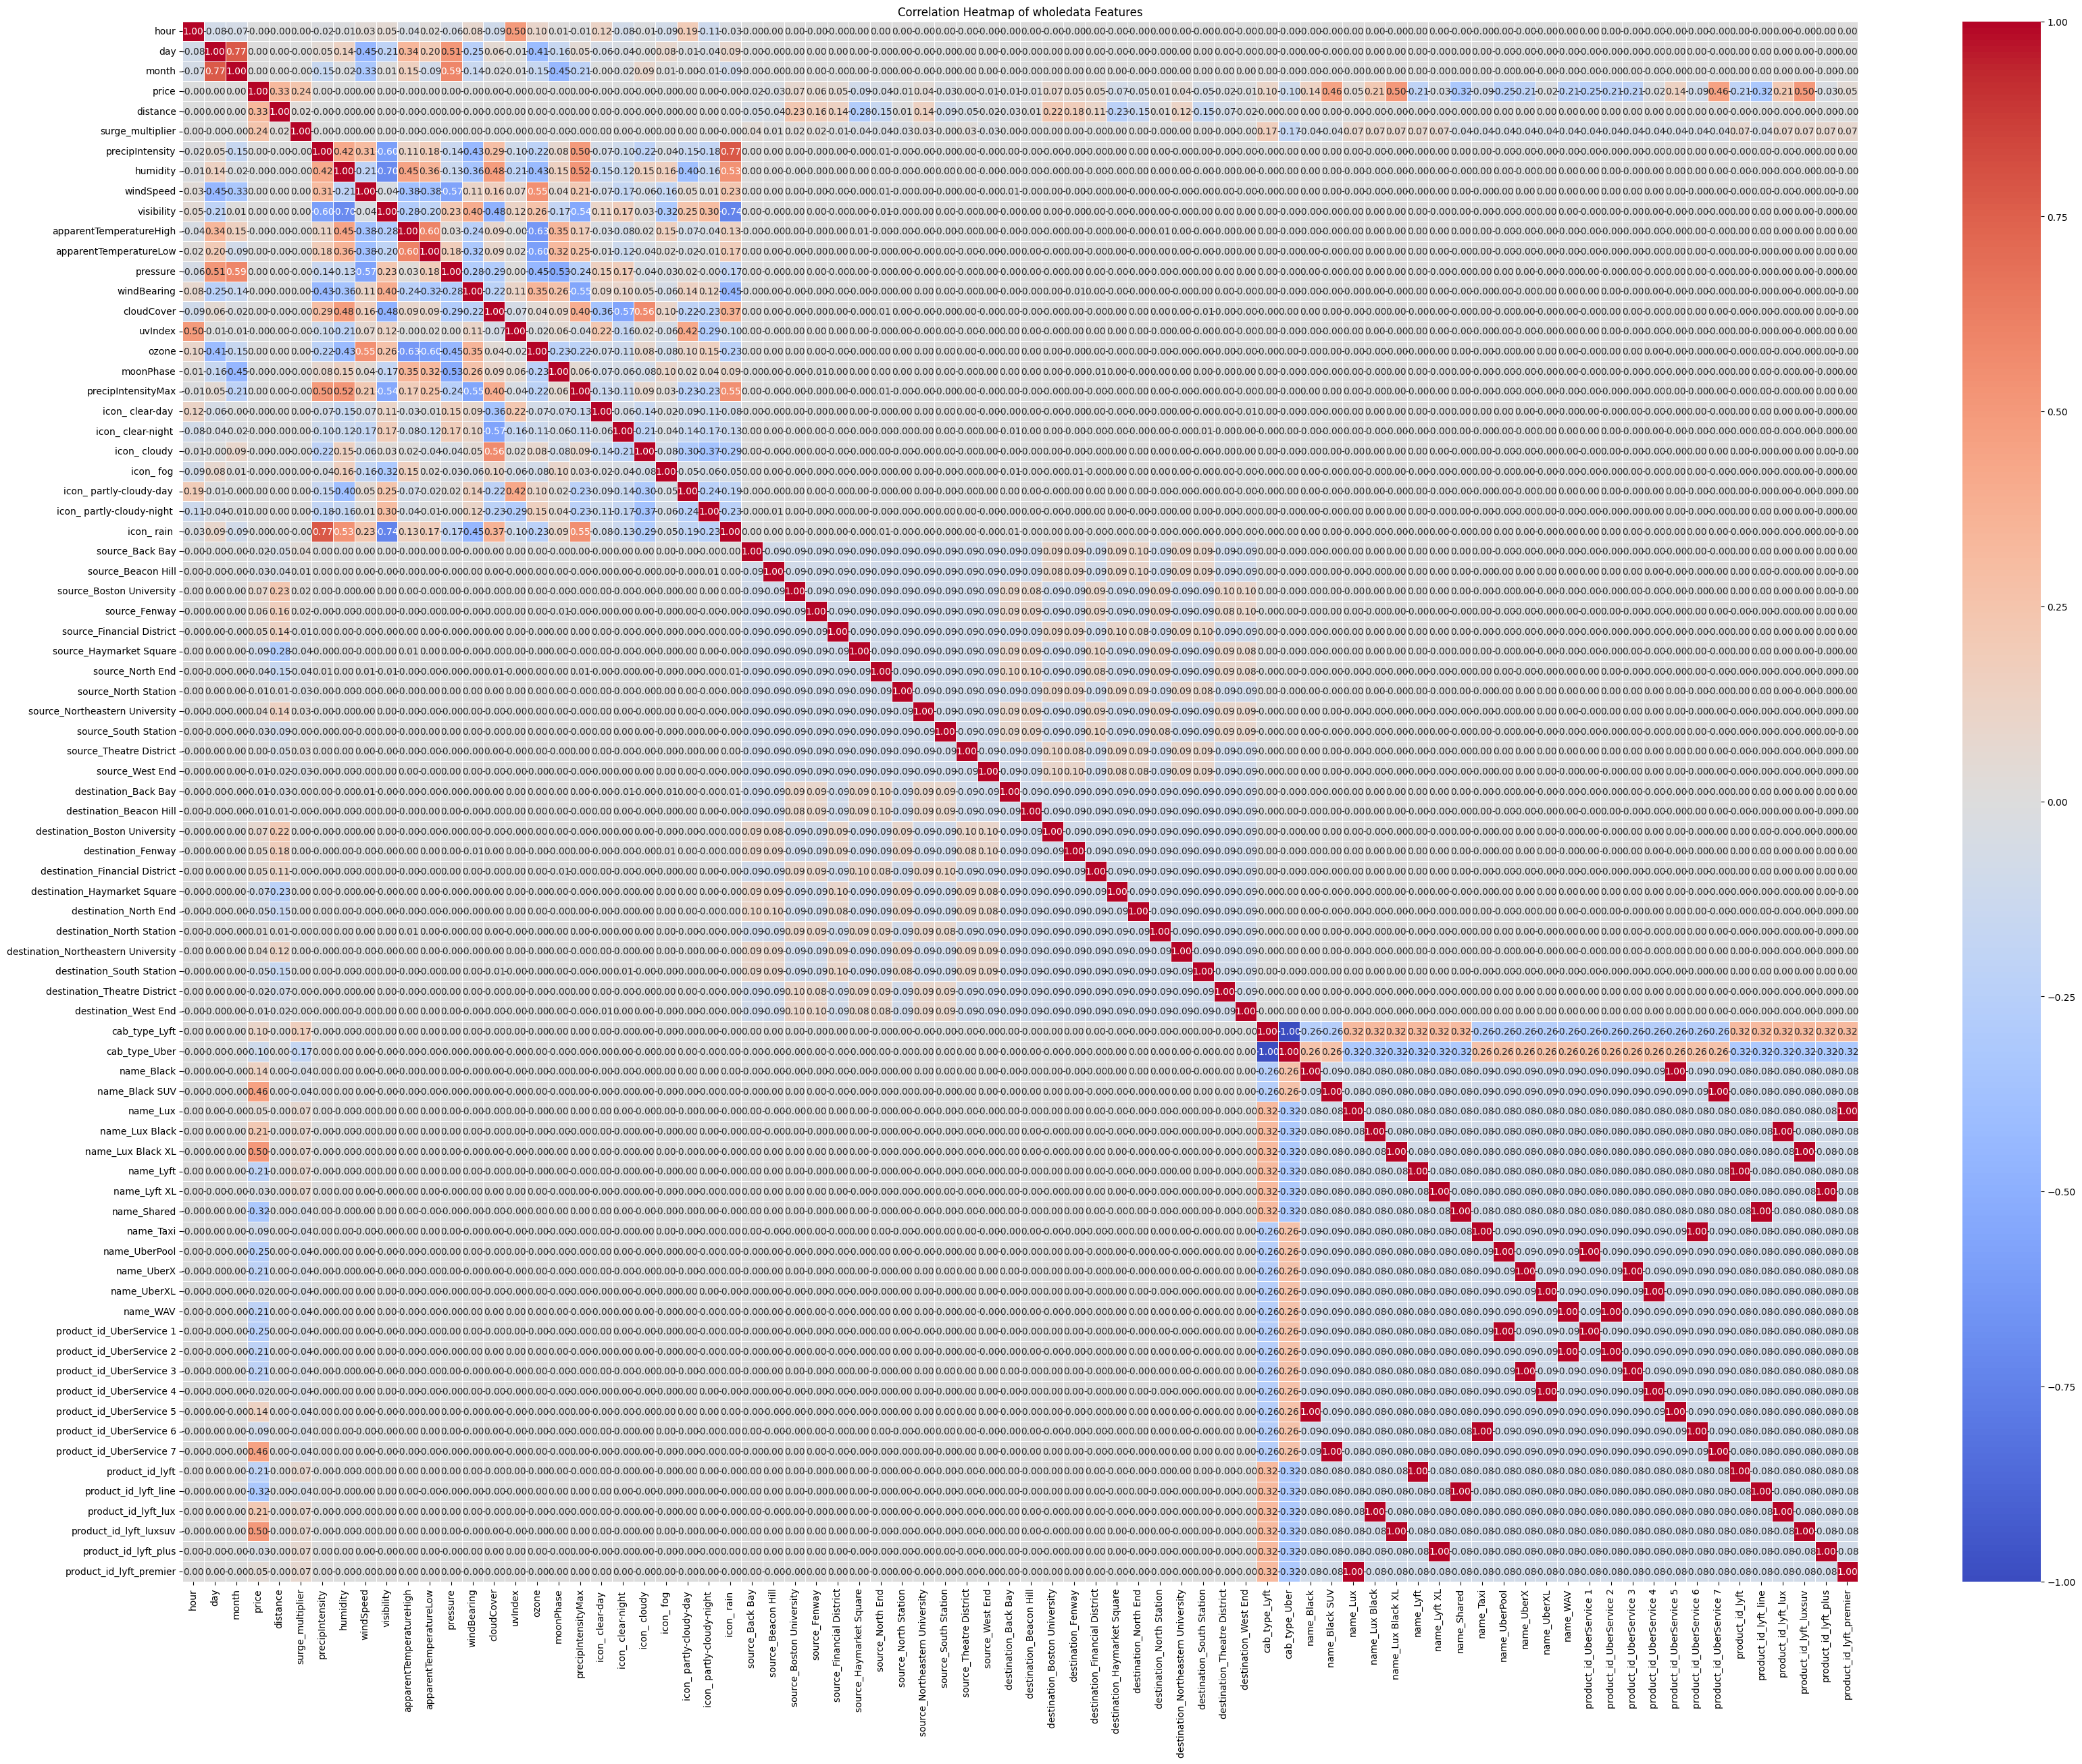

In [101]:
plt.figure(figsize=(40,30))
sns.heatmap(df9.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of wholedata Features")
plt.show()

after OHE 4 columns have doning multicollinearity in product_id and name , day and month need to drop one of them

In [102]:
df8[["product_id", "name"]].value_counts()

product_id     name        
UberService 4  UberXL          55030
UberService 1  UberPool        55020
UberService 7  Black SUV       55012
UberService 5  Black           55011
UberService 2  WAV             55003
UberService 3  UberX           54994
UberService 6  Taxi            54703
lyft_line      Shared          51215
lyft_luxsuv    Lux Black XL    51215
lyft_premier   Lux             51211
lyft           Lyft            51206
lyft_lux       Lux Black       51205
lyft_plus      Lyft XL         51200
Name: count, dtype: int64

Both columns provide the same information about the cab types, so I will keep "name" because it contains different categories. Since both columns could contribute the same in the model, I will drop the other one.

In [103]:
df9.head()

hour  day  month  price  distance  surge_multiplier  precipIntensity  \
0     1    1      1    5.0      0.44               1.0           0.0000   
1     1    1      0   11.0      0.44               1.0           0.1299   
2     1    0      0    7.0      0.44               1.0           0.0000   
3     1    0      0   26.0      0.44               1.0           0.0000   
4     1    0      0    9.0      0.44               1.0           0.0000   

   humidity  windSpeed  visibility  apparentTemperatureHigh  \
0      0.68       8.66      10.000                    37.95   
1      0.94      11.98       4.786                    43.92   
2      0.75       7.33      10.000                    44.12   
3      0.73       5.28      10.000                    38.53   
4      0.70       9.14      10.000                    35.75   

   apparentTemperatureLow  pressure  windBearing  cloudCover  uvIndex  ozone  \
0                   27.39   1021.98           57        0.72        0  303.8   
1                   36.20   1003.97           90        1.00        0  291.1   
2                   29.11    992.28          240        0.03        0  315.7   
3                   26.20   1013.73          310        0.00        0  291.1   
4                   30.29    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0       0.30              0.1276                 0                   0   
1       0.64              0.1300                 0                   0   
2       0.68              0.1064                 0                   1   
3       0.75              0.0000                 0                   1   
4       0.72              0.0001                 0                   0   

   icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0              0           0                         0   
1              0           0                         0   
2              0           0                         0   
3              0           0                         0   
4              0           0                         0   

   icon_ partly-cloudy-night   icon_ rain   source_Back Bay  \
0                           1            0                0   
1                           0            1                0   
2                           0            0                0   
3                           0            0                0   
4                           1            0                0   

   source_Beacon Hill  source_Boston University  source_Fenway  \
0                   0                         0              0   
1                   0                         0              0   
2                   0                         0              0   
3                   0                         0              0   
4                   0                         0              0   

   source_Financial District  source_Haymarket Square  source_North End  \
0                          0                        1                 0   
1                          0                        1                 0   
2                          0                        1                 0   
3                          0                        1                 0   
4                          0                        1                 0   

   source_North Station  source_Northeastern University  source_South Station  \
0                     0                               0                     0   
1                     0                               0                     0   
2                     0                               0                     0   
3                     0                               0                     0   
4                     0                               0                     0   

   source_Theatre District  source_West End  destination_Back Bay  \
0                        0                0                     0   
1                        0                0   

In [104]:
cols_to_drop = [
    "product_id_UberService 2", "product_id_UberService 3", "product_id_UberService 4", "product_id_UberService 1",
    "product_id_UberService 5", "product_id_UberService 6", "product_id_UberService 7",
    "product_id_lyft", "product_id_lyft_line", "product_id_lyft_lux", "product_id_lyft_luxsuv",
    "product_id_lyft_plus", "product_id_lyft_premier","month"
]

df10 = df9.drop(columns=cols_to_drop)

In [105]:
df10.head()

hour  day  price  distance  surge_multiplier  precipIntensity  humidity  \
0     1    1    5.0      0.44               1.0           0.0000      0.68   
1     1    1   11.0      0.44               1.0           0.1299      0.94   
2     1    0    7.0      0.44               1.0           0.0000      0.75   
3     1    0   26.0      0.44               1.0           0.0000      0.73   
4     1    0    9.0      0.44               1.0           0.0000      0.70   

   windSpeed  visibility  apparentTemperatureHigh  apparentTemperatureLow  \
0       8.66      10.000                    37.95                   27.39   
1      11.98       4.786                    43.92                   36.20   
2       7.33      10.000                    44.12                   29.11   
3       5.28      10.000                    38.53                   26.20   
4       9.14      10.000                    35.75                   30.29   

   pressure  windBearing  cloudCover  uvIndex  ozone  moonPhase  \
0   1021.98           57        0.72        0  303.8       0.30   
1   1003.97           90        1.00        0  291.1       0.64   
2    992.28          240        0.03        0  315.7       0.68   
3   1013.73          310        0.00        0  291.1       0.75   
4    998.36          303        0.44        0  347.7       0.72   

   precipIntensityMax  icon_ clear-day   icon_ clear-night   icon_ cloudy   \
0              0.1276                 0                   0              0   
1              0.1300                 0                   0              0   
2              0.1064                 0                   1              0   
3              0.0000                 0                   1              0   
4              0.0001                 0                   0              0   

   icon_ fog   icon_ partly-cloudy-day   icon_ partly-cloudy-night   \
0           0                         0                           1   
1           0                         0                           0   
2           0                         0                           0   
3           0                         0                           0   
4           0                         0                           1   

   icon_ rain   source_Back Bay  source_Beacon Hill  source_Boston University  \
0            0                0                   0                         0   
1            1                0                   0                         0   
2            0                0                   0                         0   
3            0                0                   0                         0   
4            0                0                   0                         0   

   source_Fenway  source_Financial District  source_Haymarket Square  \
0              0                          0                        1   
1              0                          0                        1   
2              0                          0                        1   
3              0                          0                        1   
4              0                          0                        1   

   source_North End  source_North Station  source_Northeastern University  \
0                 0                     0                               0   
1                 0                     0                               0   
2                 0                     0                               0   
3                 0                     0                               0   
4                 0                     0                               0   

   source_South Station  source_Theatre District  source_West End  \
0                     0                        0                0   
1                     0                        0                0   
2                     0                        0                0   
3                     0                        0                0   
4                     0                     

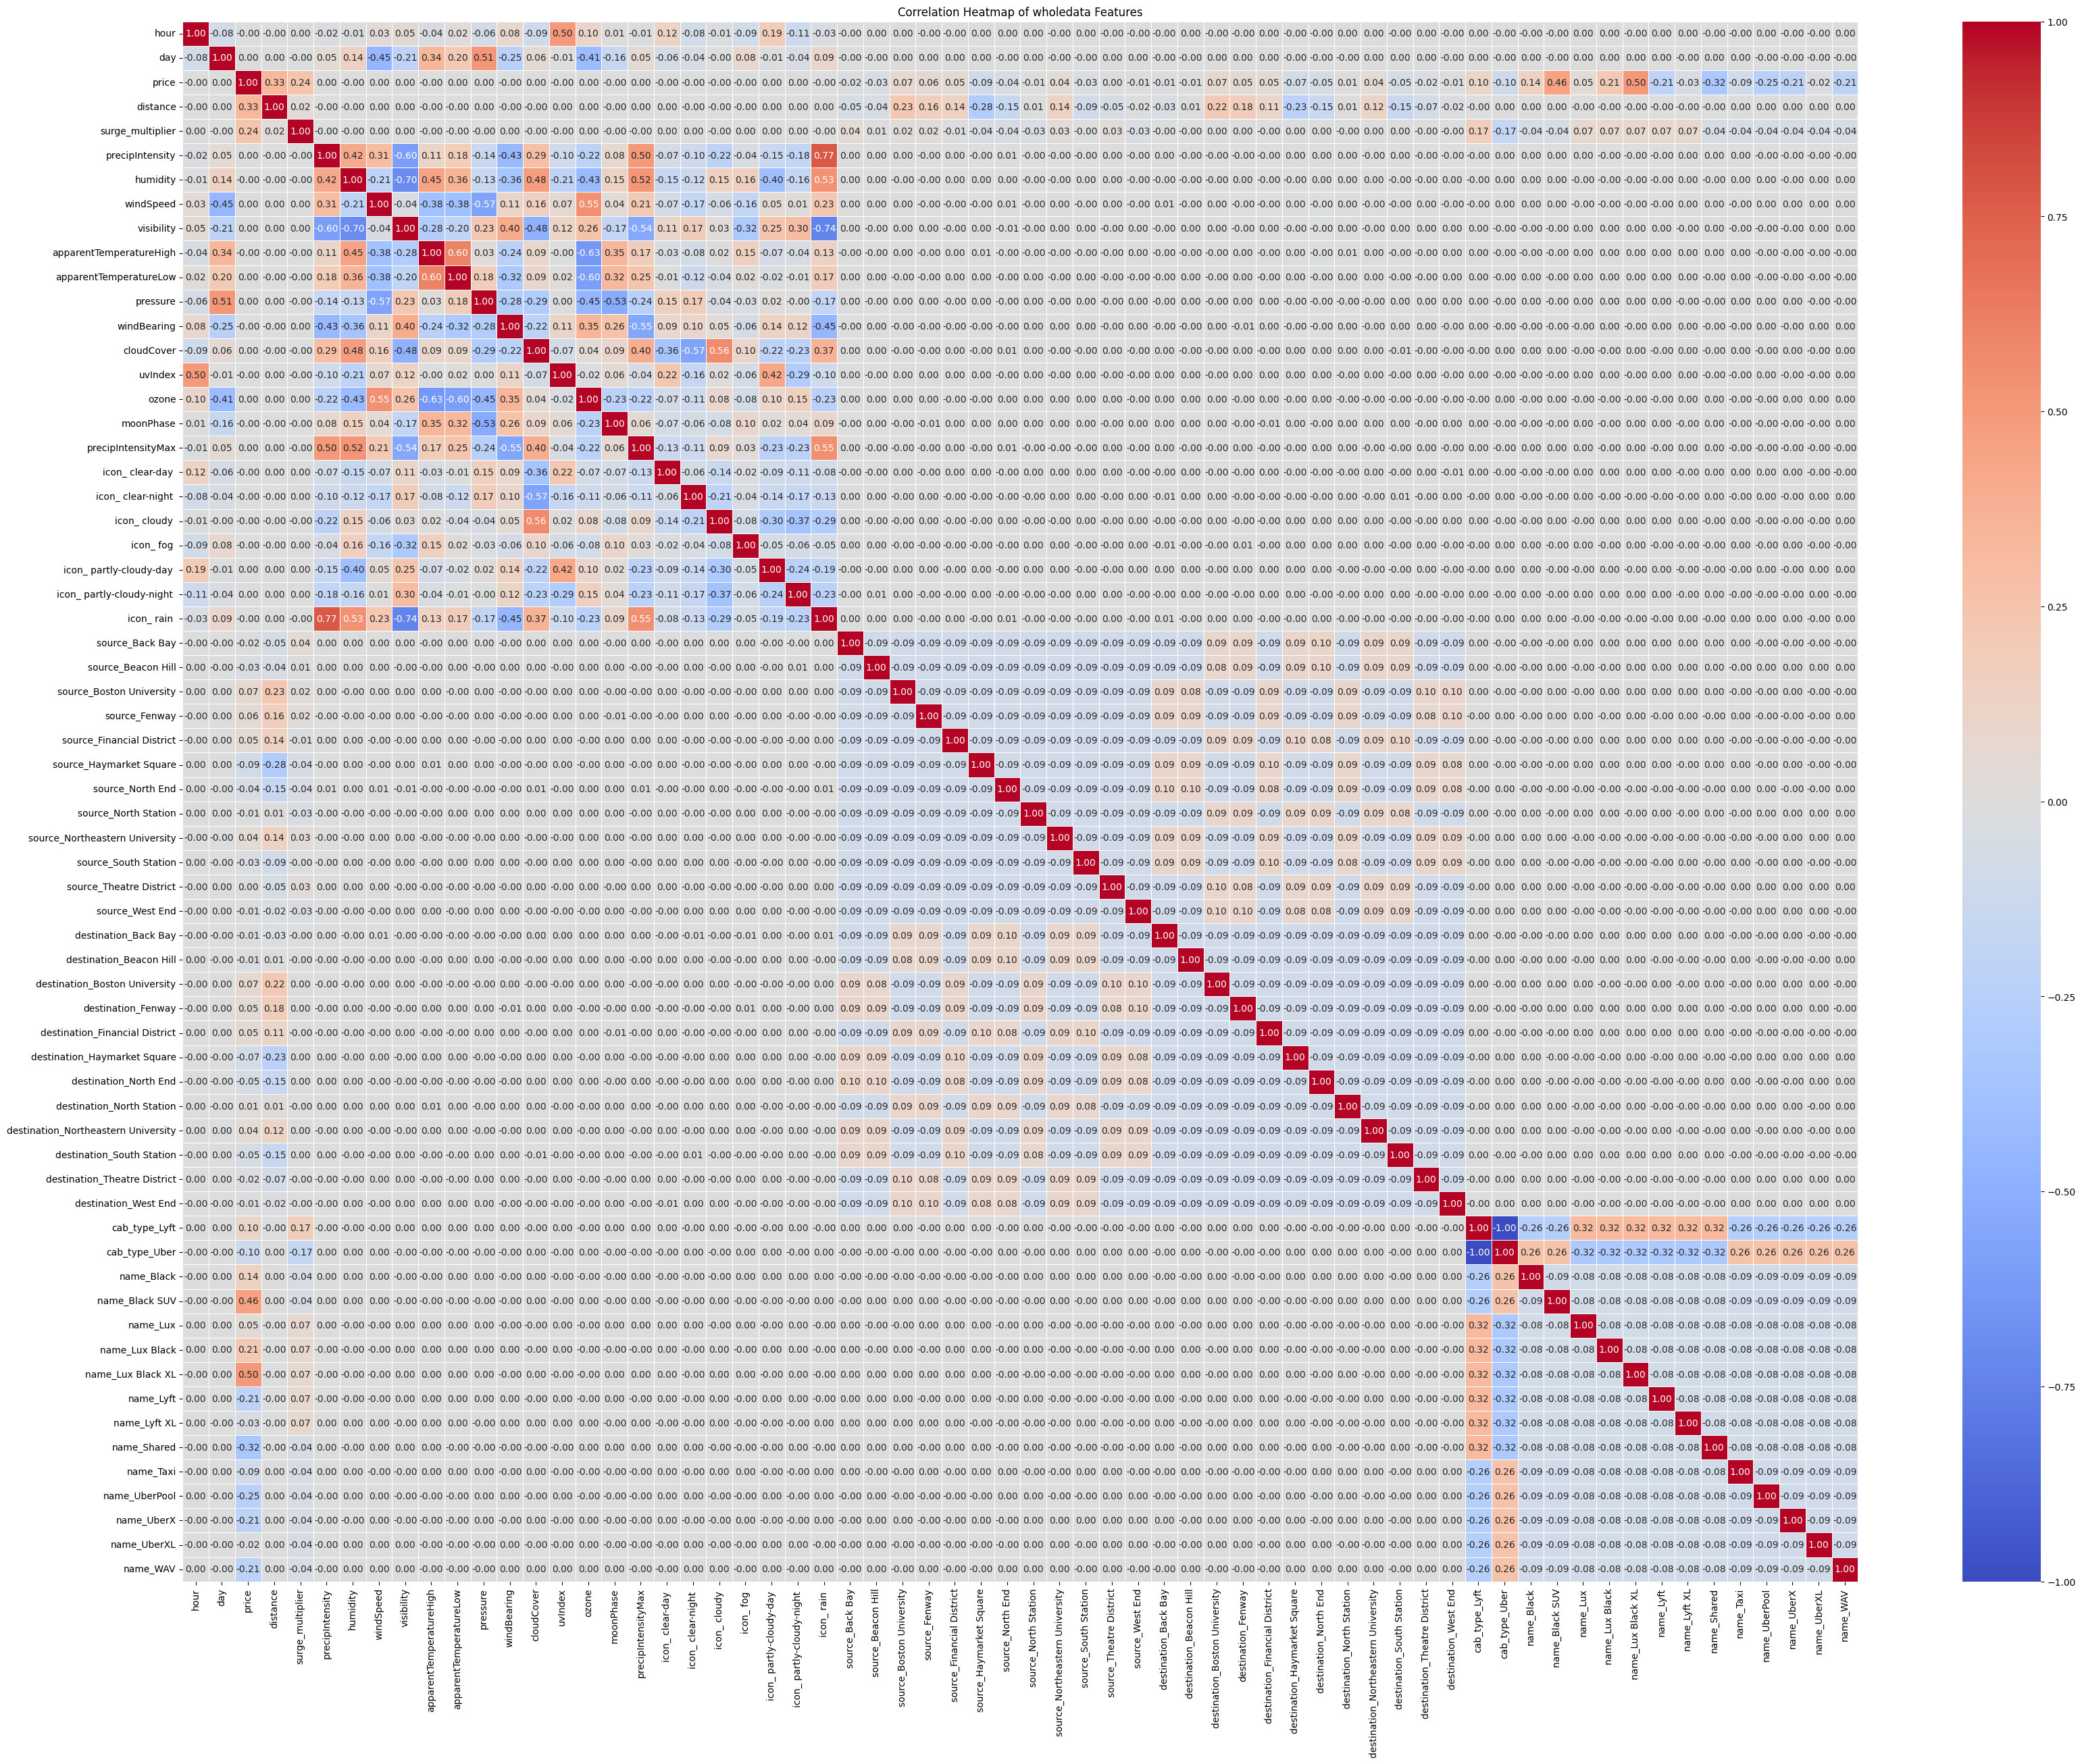

In [106]:
plt.figure(figsize=(40,30))
sns.heatmap(df10.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of wholedata Features")
plt.show()

In [107]:
df10.corr()

hour       day     price  distance  surge_multiplier  \
hour              1.000000 -0.080523 -0.001076 -0.001085          0.000605   
day              -0.080523  1.000000  0.001275  0.001997         -0.001861   
price            -0.001076  0.001275  1.000000  0.328691          0.243340   
distance         -0.001085  0.001997  0.328691  1.000000          0.024738   
surge_multiplier  0.000605 -0.001861  0.243340  0.024738          1.000000   
...                    ...       ...       ...       ...               ...   
name_Taxi        -0.000394  0.001330 -0.091481  0.000613         -0.044375   
name_UberPool     0.002052 -0.001175 -0.246986  0.000511         -0.044515   
name_UberX       -0.000724 -0.000125 -0.213792  0.000580         -0.044503   
name_UberXL      -0.000694 -0.001584 -0.020475  0.000480         -0.044519   
name_WAV          0.000948 -0.001082 -0.213826  0.000487         -0.044507   

                  precipIntensity  humidity  windSpeed  visibility  \
hour                    -0.022147 -0.014828   0.034586    0.053191   
day                      0.045806  0.136983  -0.447376   -0.205800   
price                    0.000074 -0.001322   0.001069    0.001551   
distance                -0.000263 -0.003893   0.002294    0.004052   
surge_multiplier        -0.001500 -0.001649   0.002545    0.001691   
...                           ...       ...        ...         ...   
name_Taxi                0.001343  0.001295  -0.000695   -0.001292   
name_UberPool           -0.000372  0.000629   0.000716   -0.000556   
name_UberX              -0.000314 -0.000028   0.001378   -0.000605   
name_UberXL             -0.000363  0.000216   0.000063    0.000625   
name_WAV                -0.000283  0.000185   0.000348    0.000151   

                  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
hour                            -0.041954                0.016562 -0.060738   
day                              0.339587                0.197428  0.514183   
price                           -0.000355                0.000717  0.000619   
distance                        -0.004054               -0.001434  0.003384   
surge_multiplier                -0.002053               -0.002973 -0.003087   
...                                   ...                     ...       ...   
name_Taxi                        0.000743                0.000535  0.001034   
name_UberPool                   -0.000746               -0.001275  0.000013   
name_UberX                      -0.002564               -0.002177  0.000717   
name_UberXL                     -0.001729               -0.001639 -0.000531   
name_WAV                        -0.001134               -0.002435 -0.000665   

                  windBearing  cloudCover   uvIndex     ozone  moonPhase  \
hour                 0.083100   -0.094313  0.496641  0.101345   0.010734   
day                 -0.246842    0.060441 -0.006616 -0.414385  -0.155244   
price               -0.001153    0.000644 -0.000339  0.000536  -0.001442   
distance            -0.002174   -0.000884  0.002299  0.001492  -0.004525   
surge_multiplier     0.002149   -0.002081 -0.002449  0.003362  -0.000113   
...                       ...         ...       ...       ...        ...   
name_Taxi           -0.001767    0.001824 -0.000557 -0.000447  -0.000402   
name_UberPool        0.000524   -0.001620  0.001180 -0.000032  -0.000760   
name_UberX          -0.000081    0.000297 -0.001631  0.001104  -0.001193   
name_UberXL          0.001448   -0.001089 -0.000267  0.000031  -0.000072   
name_WAV             0.000392    0.000149  0.000879  0.000327   0.000167   

                  precipIntensityMax  icon_ clear-day   icon_ clear-night   \
hour                       -0.008234          0.120990           -0.079121   
day                         0.053708         -0.057883           -0.036794   
price                       0.001057         -0.000691           -0.002094   
distance                    0.000694          0.000731           -0.00

precipIntensity is doing multicollinearity with icon one category so droping one category is not good to indentify icon value so precipIntensity has to drop.

In [108]:
df10 = df10.drop(columns="precipIntensity")

In [109]:
df10.head(5)

hour  day  price  distance  surge_multiplier  humidity  windSpeed  \
0     1    1    5.0      0.44               1.0      0.68       8.66   
1     1    1   11.0      0.44               1.0      0.94      11.98   
2     1    0    7.0      0.44               1.0      0.75       7.33   
3     1    0   26.0      0.44               1.0      0.73       5.28   
4     1    0    9.0      0.44               1.0      0.70       9.14   

   visibility  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
0      10.000                    37.95                   27.39   1021.98   
1       4.786                    43.92                   36.20   1003.97   
2      10.000                    44.12                   29.11    992.28   
3      10.000                    38.53                   26.20   1013.73   
4      10.000                    35.75                   30.29    998.36   

   windBearing  cloudCover  uvIndex  ozone  moonPhase  precipIntensityMax  \
0           57        0.72        0  303.8       0.30              0.1276   
1           90        1.00        0  291.1       0.64              0.1300   
2          240        0.03        0  315.7       0.68              0.1064   
3          310        0.00        0  291.1       0.75              0.0000   
4          303        0.44        0  347.7       0.72              0.0001   

   icon_ clear-day   icon_ clear-night   icon_ cloudy   icon_ fog   \
0                 0                   0              0           0   
1                 0                   0              0           0   
2                 0                   1              0           0   
3                 0                   1              0           0   
4                 0                   0              0           0   

   icon_ partly-cloudy-day   icon_ partly-cloudy-night   icon_ rain   \
0                         0                           1            0   
1                         0                           0            1   
2                         0                           0            0   
3                         0                           0            0   
4                         0                           1            0   

   source_Back Bay  source_Beacon Hill  source_Boston University  \
0                0                   0                         0   
1                0                   0                         0   
2                0                   0                         0   
3                0                   0                         0   
4                0                   0                         0   

   source_Fenway  source_Financial District  source_Haymarket Square  \
0              0                          0                        1   
1              0                          0                        1   
2              0                          0                        1   
3              0                          0                        1   
4              0                          0                        1   

   source_North End  source_North Station  source_Northeastern University  \
0                 0                     0                               0   
1                 0                     0                               0   
2                 0                     0                               0   
3                 0                     0                               0   
4                 0                     0                               0   

   source_South Station  source_Theatre District  source_West End  \
0                     0                        0                0   
1                     0                        0                0   
2                     0                        0                0   
3                     0                        0                0   
4                     0                        0                0   

   destination_Back Bay  destination_Beacon Hill  \
0                     0 

In [110]:
df10.isnull().sum().sum()

0

In [111]:
df10.shape

(692025, 63)

In [112]:
df10

hour  day  price  distance  surge_multiplier  humidity  windSpeed  \
0          1    1    5.0      0.44               1.0      0.68       8.66   
1          1    1   11.0      0.44               1.0      0.94      11.98   
2          1    0    7.0      0.44               1.0      0.75       7.33   
3          1    0   26.0      0.44               1.0      0.73       5.28   
4          1    0    9.0      0.44               1.0      0.70       9.14   
...      ...  ...    ...       ...               ...       ...        ...   
693066     2    2   13.0      1.00               1.0      0.74       2.34   
693067     2    2    9.5      1.00               1.0      0.74       2.34   
693068     2    2   13.5      1.00               1.0      0.74       2.34   
693069     2    2   27.0      1.00               1.0      0.74       2.34   
693070     2    2   10.0      1.00               1.0      0.74       2.34   

        visibility  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
0           10.000                    37.95                   27.39   1021.98   
1            4.786                    43.92                   36.20   1003.97   
2           10.000                    44.12                   29.11    992.28   
3           10.000                    38.53                   26.20   1013.73   
4           10.000                    35.75                   30.29    998.36   
...            ...                      ...                     ...       ...   
693066       9.785                    44.09                   35.48   1023.57   
693067       9.785                    44.09                   35.48   1023.57   
693068       9.785                    44.09                   35.48   1023.57   
693069       9.785                    44.09                   35.48   1023.57   
693070       9.785                    44.09                   35.48   1023.57   

        windBearing  cloudCover  uvIndex  ozone  moonPhase  \
0                57        0.72        0  303.8       0.30   
1                90        1.00        0  291.1       0.64   
2               240        0.03        0  315.7       0.68   
3               310        0.00        0  291.1       0.75   
4               303        0.44        0  347.7       0.72   
...             ...         ...      ...    ...        ...   
693066          133        0.31        0  271.5       0.82   
693067          133        0.31        0  271.5       0.82   
693068          133        0.31        0  271.5       0.82   
693069          133        0.31        0  271.5       0.82   
693070          133        0.31        0  271.5       0.82   

        precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0                   0.1276                 0                   0   
1                   0.1300                 0                   0   
2                   0.1064                 0                   1   
3                   0.0000                 0                   1   
4                   0.0001                 0                   0   
...                    ...               ...                 ...   
693066              0.0000                 0                   0   
693067              0.0000                 0                   0   
693068              0.0000                 0                   0   
693069              0.0000                 0                   0   
693070              0.0000                 0                   0   

        icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0                   0           0                         0   
1                   0           0                         0   
2                   0           0                         0   
3                   0           0                         0   
4                   0           0                         0   
...               ...         ...                       ...   
693066              0           0                         0   
693067              0           0           

In [113]:
from sklearn.preprocessing import StandardScaler

columns = ["price", "distance", "surge_multiplier", "humidity", "windSpeed", "visibility",  
           "apparentTemperatureHigh", "apparentTemperatureLow", "pressure", "windBearing", "cloudCover",  
           "uvIndex", "ozone", "moonPhase", "precipIntensityMax"]

scaler = StandardScaler()
df10[columns] = scaler.fit_transform(df10[columns])

In [114]:
df10.head()

hour  day     price  distance  surge_multiplier  humidity  windSpeed  \
0     1    1 -1.258069 -1.536241         -0.151466 -0.440774   0.785898   
1     1    1 -0.590433 -1.536241         -0.151466  1.435072   1.840368   
2     1    0 -1.035524 -1.536241         -0.151466  0.064261   0.363475   
3     1    0  1.078658 -1.536241         -0.151466 -0.080035  -0.287629   
4     1    0 -0.812978 -1.536241         -0.151466 -0.296478   0.938352   

   visibility  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
0    0.588487                -0.477939               -0.341061  0.881697   
1   -1.414885                 0.300663                0.752120 -0.455178   
2    0.588487                 0.326746               -0.127637 -1.322922   
3    0.588487                -0.402296               -0.488721  0.269303   
4    0.588487                -0.764861                0.018783 -0.871606   

   windBearing  cloudCover   uvIndex     ozone  moonPhase  precipIntensityMax  \
0    -1.645468    0.093584 -0.525096 -0.347265  -1.139955            1.634755   
1    -1.312478    0.874497 -0.525096 -0.801601   0.249213            1.678231   
2     0.201114   -1.830807 -0.525096  0.078452   0.412644            1.250716   
3     0.907457   -1.914476 -0.525096 -0.801601   0.698649           -0.676727   
4     0.836823   -0.687328 -0.525096  1.223235   0.576076           -0.674915   

   icon_ clear-day   icon_ clear-night   icon_ cloudy   icon_ fog   \
0                 0                   0              0           0   
1                 0                   0              0           0   
2                 0                   1              0           0   
3                 0                   1              0           0   
4                 0                   0              0           0   

   icon_ partly-cloudy-day   icon_ partly-cloudy-night   icon_ rain   \
0                         0                           1            0   
1                         0                           0            1   
2                         0                           0            0   
3                         0                           0            0   
4                         0                           1            0   

   source_Back Bay  source_Beacon Hill  source_Boston University  \
0                0                   0                         0   
1                0                   0                         0   
2                0                   0                         0   
3                0                   0                         0   
4                0                   0                         0   

   source_Fenway  source_Financial District  source_Haymarket Square  \
0              0                          0                        1   
1              0                          0                        1   
2              0                          0                        1   
3              0                          0                        1   
4              0                          0                        1   

   source_North End  source_North Station  source_Northeastern University  \
0                 0                     0                               0   
1                 0                     0                               0   
2                 0                     0                               0   
3                 0                     0                               0   
4                 0                     0                               0   

   source_South Station  source_Theatre District  source_West End  \
0                     0                        0                0   
1                     0                        0                0   
2                     0                        0                0   
3                     0                        0                0   
4                     0                        0                0   

   destination_Back Bay  destinati

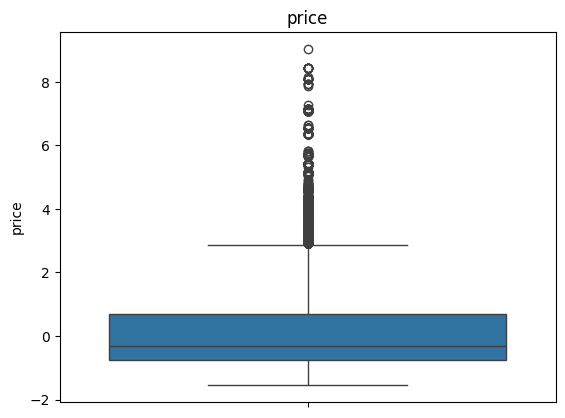

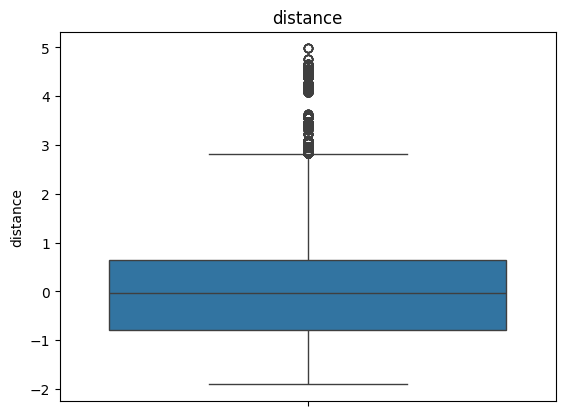

In [115]:
columns = ["price", "distance"]
          

for col in columns:  
    plt.figure()  
    sns.boxplot(y=df10[col])  
    plt.title(col)  
    plt.show()  

In [116]:
columns = ["price", "distance"]

for col in columns:  
    q1, q3 = df10[col].quantile([0.25, 0.75])  
    iqr = q3 - q1  
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr  
    df10 = df10[(df10[col] >= low) & (df10[col] <= high)]  

df10.shape

(675532, 63)

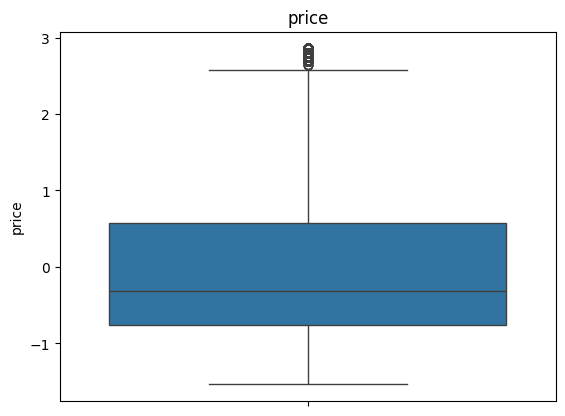

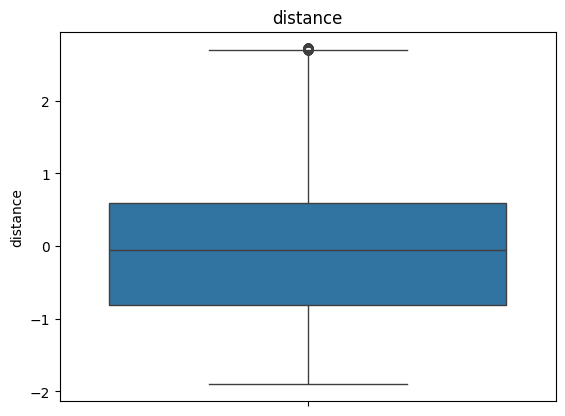

In [117]:
columns = ["price", "distance"]
          

for col in columns:  
    plt.figure()  
    sns.boxplot(y=df10[col])  
    plt.title(col)  
    plt.show()  

In [118]:
df10

hour  day     price  distance  surge_multiplier  humidity  windSpeed  \
0          1    1 -1.258069 -1.536241         -0.151466 -0.440774   0.785898   
1          1    1 -0.590433 -1.536241         -0.151466  1.435072   1.840368   
2          1    0 -1.035524 -1.536241         -0.151466  0.064261   0.363475   
3          1    0  1.078658 -1.536241         -0.151466 -0.080035  -0.287629   
4          1    0 -0.812978 -1.536241         -0.151466 -0.296478   0.938352   
...      ...  ...       ...       ...               ...       ...        ...   
693066     2    2 -0.367888 -1.044588         -0.151466 -0.007887  -1.221407   
693067     2    2 -0.757342 -1.044588         -0.151466 -0.007887  -1.221407   
693068     2    2 -0.312251 -1.044588         -0.151466 -0.007887  -1.221407   
693069     2    2  1.189930 -1.044588         -0.151466 -0.007887  -1.221407   
693070     2    2 -0.701706 -1.044588         -0.151466 -0.007887  -1.221407   

        visibility  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
0         0.588487                -0.477939               -0.341061  0.881697   
1        -1.414885                 0.300663                0.752120 -0.455178   
2         0.588487                 0.326746               -0.127637 -1.322922   
3         0.588487                -0.402296               -0.488721  0.269303   
4         0.588487                -0.764861                0.018783 -0.871606   
...            ...                      ...                     ...       ...   
693066    0.505878                 0.322834                0.662779  0.999722   
693067    0.505878                 0.322834                0.662779  0.999722   
693068    0.505878                 0.322834                0.662779  0.999722   
693069    0.505878                 0.322834                0.662779  0.999722   
693070    0.505878                 0.322834                0.662779  0.999722   

        windBearing  cloudCover   uvIndex     ozone  moonPhase  \
0         -1.645468    0.093584 -0.525096 -0.347265  -1.139955   
1         -1.312478    0.874497 -0.525096 -0.801601   0.249213   
2          0.201114   -1.830807 -0.525096  0.078452   0.412644   
3          0.907457   -1.914476 -0.525096 -0.801601   0.698649   
4          0.836823   -0.687328 -0.525096  1.223235   0.576076   
...             ...         ...       ...       ...        ...   
693066    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693067    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693068    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693069    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693070    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   

        precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0                 1.634755                 0                   0   
1                 1.678231                 0                   0   
2                 1.250716                 0                   1   
3                -0.676727                 0                   1   
4                -0.674915                 0                   0   
...                    ...               ...                 ...   
693066           -0.676727                 0                   0   
693067           -0.676727                 0                   0   
693068           -0.676727                 0                   0   
693069           -0.676727                 0                   0   
693070           -0.676727                 0                   0   

        icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0                   0           0                         0   
1                   0           0                         0   
2                   0           0                         0   
3                   0           0                         0   
4                   0           0                         0   
...               ...         ...                       ...   
693066              0  

In [119]:
df10.shape

(675532, 63)

I have transformed the features and checked the correlation. There are no issues, and the data is now ready for model building.

We will split the data into X (features) and y (target variable).

In [120]:
X = df10.drop(columns=["price"])
y = df10["price"] 

Now, we will split our data into training and testing sets to evaluate the model's performance on unseen data.

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((472872, 62), (202660, 62), (472872,), (202660,))

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)
y_pred_train = lrmodel.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse =  np.sqrt(mse)  
mae = mean_absolute_error(y_train, y_pred_train)

n = len(y_train) 
p = X_train.shape[1] 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adj_r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

R² Score: 0.9295793579354936
Adjusted R² Score: 0.9295701235939138
Mean Squared Error (MSE): 0.059750830461084994
Root Mean Squared Error (RMSE): 0.24443982993997723
Mean Absolute Error (MAE): 0.18245912066563727


In [123]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lrmodel, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.92944871 0.92934745 0.92951426 0.92981382 0.9296774 ]
Mean Accuracy: 0.9296


In [124]:
y_pred = lrmodel.predict(X_test)

r2 = r2_score(y_test, y_pred)
n = len(y_test)  
p = X_test.shape[1]  
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: 0.9298
Adjusted R-squared: 0.9297
Mean Squared Error (MSE): 0.0597
Root Mean Squared Error (RMSE): 0.2443
Mean Absolute Error (MAE): 0.1824


now i will check the performance in whole data with sarcastic errors to not removing outliers , if the score is low then to much means high varience so model is not generalizing the parttrens of data , if it is close to test score so the model is doning well 

In [125]:
df.head()

timestamp  hour  day  month             datetime          timezone  \
0  1.544953e+09     9   16     12  2018-12-16 09:30:07  America/New_York   
1  1.543284e+09     2   27     11  2018-11-27 02:00:23  America/New_York   
2  1.543367e+09     1   28     11  2018-11-28 01:00:22  America/New_York   
3  1.543554e+09     4   30     11  2018-11-30 04:53:02  America/New_York   
4  1.543463e+09     3   29     11  2018-11-29 03:49:20  America/New_York   

             source    destination cab_type    product_id          name  \
0  Haymarket Square  North Station     Lyft     lyft_line        Shared   
1  Haymarket Square  North Station     Lyft  lyft_premier           Lux   
2  Haymarket Square  North Station     Lyft          lyft          Lyft   
3  Haymarket Square  North Station     Lyft   lyft_luxsuv  Lux Black XL   
4  Haymarket Square  North Station     Lyft     lyft_plus       Lyft XL   

   price  distance  surge_multiplier  latitude  longitude  temperature  \
0    5.0      0.44               1.0   42.2148    -71.033        42.34   
1   11.0      0.44               1.0   42.2148    -71.033        43.58   
2    7.0      0.44               1.0   42.2148    -71.033        38.33   
3   26.0      0.44               1.0   42.2148    -71.033        34.38   
4    9.0      0.44               1.0   42.2148    -71.033        37.44   

   apparentTemperature    short_summary  \
0                37.12   Mostly Cloudy    
1                37.35            Rain    
2                32.93           Clear    
3                29.63           Clear    
4                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                  1543460400   partly-cloudy-night    

   dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  sunriseTime  \
0     32.70   1021.98           57        0.72        0  303.8   1544962084   

code that convert raw data into model data , those are irrelevant to drop and relevent to feature engineering 

In [126]:
def preprocess_validation_data(df):
    drop_cols = [
        "timestamp", "datetime","product_id", "short_summary","timezone", "latitude", "longitude", "long_summary",
        "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime",
        "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime",
        "temperature", "temperatureHigh", "temperatureHighTime", "temperatureLowTime",
        "apparentTemperatureHighTime", "apparentTemperatureLowTime", "windGustTime", "dewPoint", 
        "sunriseTime", "sunsetTime", "apparentTemperature", "uvIndexTime", "windGust", 
        "precipProbability", "temperatureLow", "precipIntensity",
        "product_id_UberService 2", "product_id_UberService 3", "product_id_UberService 4", 
        "product_id_UberService 1", "product_id_UberService 5", "product_id_UberService 6", 
        "product_id_UberService 7", "product_id_lyft", "product_id_lyft_line", 
        "product_id_lyft_lux", "product_id_lyft_luxsuv", "product_id_lyft_plus", 
        "product_id_lyft_premier", "month"
    ]
    df = df.drop(columns=drop_cols, errors='ignore')
    
    def categorize_hour(hour):
        if hour in [0, 23, 12, 15, 18, 16, 10, 17, 13, 14]:
            return "Peak"
        elif hour in [11, 22, 9, 1, 2, 4, 3]:
            return "Medium"
        else:
            return "Low"
    df["hour"] = df["hour"].apply(categorize_hour)
    
    def categorize_day(day):
        if day in [1,2,3,4,9,10,13,14]:
            return "Peakday"
        elif day in [15,16,17,18,26,27]:
            return "Mediumday"
        else:
            return "Lowday"
    df["day"] = df["day"].apply(categorize_day)
    
    le = LabelEncoder()
    df["hour"] = le.fit_transform(df["hour"])
    df["day"] = le.fit_transform(df["day"])
    
    df = pd.get_dummies(df, columns=['icon', 'source', 'destination', 'cab_type', 'name'])
    
    df = df.replace({True: 1, False: 0})
    
    scale_cols = ["price", "distance", "surge_multiplier", "humidity", "windSpeed", "visibility",  
                  "apparentTemperatureHigh", "apparentTemperatureLow", "pressure", "windBearing", "cloudCover",  
                  "uvIndex", "ozone", "moonPhase", "precipIntensityMax"]
    
    scaler = StandardScaler()
    df[scale_cols] = scaler.fit_transform(df[scale_cols])
    
    return df

In [127]:
preprocess_validation_data = preprocess_validation_data(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_10132\973943967.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [128]:
preprocess_validation_data

hour  day     price  distance  surge_multiplier  humidity  windSpeed  \
0          1    1 -1.258069 -1.536241         -0.151466 -0.440774   0.785898   
1          1    1 -0.590433 -1.536241         -0.151466  1.435072   1.840368   
2          1    0 -1.035524 -1.536241         -0.151466  0.064261   0.363475   
3          1    0  1.078658 -1.536241         -0.151466 -0.080035  -0.287629   
4          1    0 -0.812978 -1.536241         -0.151466 -0.296478   0.938352   
...      ...  ...       ...       ...               ...       ...        ...   
693066     2    2 -0.367888 -1.044588         -0.151466 -0.007887  -1.221407   
693067     2    2 -0.757342 -1.044588         -0.151466 -0.007887  -1.221407   
693068     2    2 -0.312251 -1.044588         -0.151466 -0.007887  -1.221407   
693069     2    2  1.189930 -1.044588         -0.151466 -0.007887  -1.221407   
693070     2    2 -0.701706 -1.044588         -0.151466 -0.007887  -1.221407   

        visibility  apparentTemperatureHigh  apparentTemperatureLow  pressure  \
0         0.588487                -0.477939               -0.341061  0.881697   
1        -1.414885                 0.300663                0.752120 -0.455178   
2         0.588487                 0.326746               -0.127637 -1.322922   
3         0.588487                -0.402296               -0.488721  0.269303   
4         0.588487                -0.764861                0.018783 -0.871606   
...            ...                      ...                     ...       ...   
693066    0.505878                 0.322834                0.662779  0.999722   
693067    0.505878                 0.322834                0.662779  0.999722   
693068    0.505878                 0.322834                0.662779  0.999722   
693069    0.505878                 0.322834                0.662779  0.999722   
693070    0.505878                 0.322834                0.662779  0.999722   

        windBearing  cloudCover   uvIndex     ozone  moonPhase  \
0         -1.645468    0.093584 -0.525096 -0.347265  -1.139955   
1         -1.312478    0.874497 -0.525096 -0.801601   0.249213   
2          0.201114   -1.830807 -0.525096  0.078452   0.412644   
3          0.907457   -1.914476 -0.525096 -0.801601   0.698649   
4          0.836823   -0.687328 -0.525096  1.223235   0.576076   
...             ...         ...       ...       ...        ...   
693066    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693067    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693068    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693069    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   
693070    -0.878582   -1.049895 -0.525096 -1.502781   0.984655   

        precipIntensityMax  icon_ clear-day   icon_ clear-night   \
0                 1.634755                 0                   0   
1                 1.678231                 0                   0   
2                 1.250716                 0                   1   
3                -0.676727                 0                   1   
4                -0.674915                 0                   0   
...                    ...               ...                 ...   
693066           -0.676727                 0                   0   
693067           -0.676727                 0                   0   
693068           -0.676727                 0                   0   
693069           -0.676727                 0                   0   
693070           -0.676727                 0                   0   

        icon_ cloudy   icon_ fog   icon_ partly-cloudy-day   \
0                   0           0                         0   
1                   0           0                         0   
2                   0           0                         0   
3                   0           0                         0   
4                   0           0                         0   
...               ...         ...                       ...   
693066              0  

In [161]:
X2 = preprocess_validation_data.drop(columns=["price"])
y2 = preprocess_validation_data["price"] 

In [163]:
y_pred_validation_lrmodel = lrmodel.predict(X2)

r2 = r2_score(y2, y_pred_validation_lrmodel)
n = len(y2)  
p = X_test.shape[1]  
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mse = mean_squared_error(y2, y_pred_validation_lrmodel)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2, y_pred_validation_lrmodel)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: 0.9153
Adjusted R-squared: 0.9152
Mean Squared Error (MSE): 0.0847
Root Mean Squared Error (RMSE): 0.2911
Mean Absolute Error (MAE): 0.1985


In [134]:
cv_scores = cross_val_score(lrmodel, X2, y2, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.91898891 0.9200634  0.91857877 0.91981792 0.9191642 ]
Mean Accuracy: 0.9193


so the score of whole data is close to test data of varience 1 so the model is good at unseen data , now i want to gain more score and also less in whole varince for this i will use different algos , for best model .

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
GBmodel = GradientBoostingRegressor()

In [137]:
GBmodel.fit(X_train,y_train)

GradientBoostingRegressor()

In [138]:
gb_pred = GBmodel.predict(X_train)
r2 = r2_score(y_train, gb_pred)
mse = mean_squared_error(y_train, gb_pred)
rmse =  np.sqrt(mse)  
mae = mean_absolute_error(y_train, gb_pred)

n = len(y_train) 
p = X_train.shape[1] 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² Score: {r2}")
print(f"Adjusted R² Score: {adj_r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

R² Score: 0.9551074258782017
Adjusted R² Score: 0.9551015390621819
Mean Squared Error (MSE): 0.03809065789056808
Root Mean Squared Error (RMSE): 0.19516828095407326
Mean Absolute Error (MAE): 0.13832262303724388


In [139]:
y_pred2 = GBmodel.predict(X_test)

r2 = r2_score(y_test, y_pred2)
n = len(y2)  
p = X_test.shape[1]  
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)

print(f"R-squared: {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R-squared: 0.9551
Adjusted R-squared: 0.9551
Mean Squared Error (MSE): 0.0381
Root Mean Squared Error (RMSE): 0.1953
Mean Absolute Error (MAE): 0.1382


In [140]:
cv_scores = cross_val_score(GBmodel, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation Scores GBmodel: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores GBmodel: [0.95497229 0.9545061  0.95510776 0.95578669 0.95469415]
Mean Accuracy: 0.9550


In [164]:
y_pred_validation_gbmodel = GBmodel.predict(X2)

r2 = r2_score(y2, y_pred_validation_gbmodel)
n = len(y2)  
p = X_test.shape[1]  
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
mse = mean_squared_error(y2, y_pred_validation_gbmodel)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2, y_pred_validation_gbmodel)

print(f"R-squared validation whole data GBmodel: {r2:.4f}")
print(f"Adjusted R-squared validation whole data GBmodel: {adj_r2:.4f}")
print(f"Mean Squared Error (MSE) validation whole data GBmodel : {mse:.4f}")
print(f"Root Mean Squared Error (RMSE) validation whole data GBmodel: {rmse:.4f}")
print(f"Mean Absolute Error (MAE) validation whole data GBmodel: {mae:.4f}")

R-squared validation whole data GBmodel: 0.9383
Adjusted R-squared validation whole data GBmodel: 0.9383
Mean Squared Error (MSE) validation whole data GBmodel : 0.0617
Root Mean Squared Error (RMSE) validation whole data GBmodel: 0.2484
Mean Absolute Error (MAE) validation whole data GBmodel: 0.1531


so the GradientBoost is performing well in training data and test data  giving 95 r2-score and also in whole data of validation of 93 which is greater than LinearRegression , so the best model is GradientBoost for more accuracy grt the chance of overfitting so stoped in this case  

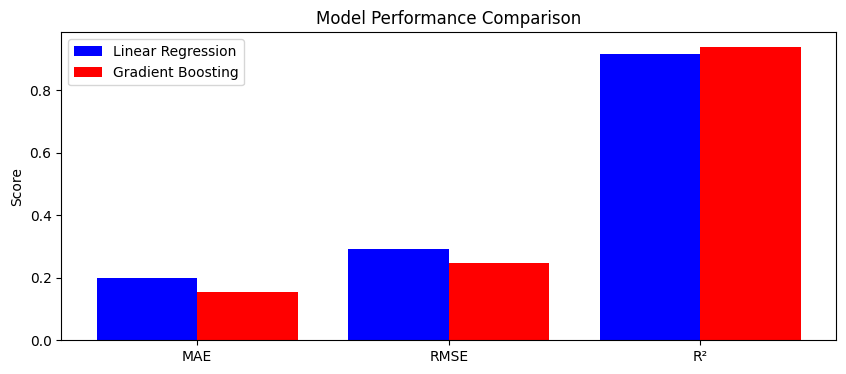

In [165]:
lr_values = [mean_absolute_error(y2, y_pred_validation_lrmodel), np.sqrt(mean_squared_error(y2, y_pred_validation_lrmodel)), r2_score(y2, y_pred_validation_lrmodel)]
gb_values = [mean_absolute_error(y2, y_pred_validation_gbmodel), np.sqrt(mean_squared_error(y2, y_pred_validation_gbmodel)), r2_score(y2, y_pred_validation_gbmodel)]
metrics = ['MAE', 'RMSE', 'R²']
x = np.arange(len(metrics))
width = 0.4
plt.figure(figsize=(10,4))
plt.bar(x - width / 2, lr_values, width=width, label="Linear Regression", color='blue')
plt.bar(x + width / 2, gb_values, width=width, label="Gradient Boosting", color='red')
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()

In this visualization i can see that the MAE and RMSE of the Gradient Boosting model are lower than those of the Linear Regression model the R² score of the Gradient Boosting model is higher than that of the Linear Regression model the best model is Gradient Boosting.

Higher accuracy can increase the risk of overfitting when the model encounters unseen new data.

using different models can improve accuracy, but it essential to check for overfitting and ensure the model generalizes well to new data but we don't have more unseen data so thats why we don't use more algo for this  Gradient Boost is doing best this time 


The Gradient Boosting model has a 95% R² score on both training and test sets, with 95% in cross-validation, outperforming the Linear Regression model, which has 92% on training/test and 92% in CV. On the entire dataset, Gradient Boosting gives an R² of 93%, while Linear Regression gives 91%.



In [167]:
import pickle
with open("GBmodel_dynamicpricing.pkl", "wb") as model_file:
    pickle.dump(GBmodel, model_file)

In [169]:
with open("GBmodel_dynamicpricing.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [170]:
y_pred = loaded_model.predict(X_test) 
print(y_pred) 

[-0.19000572 -0.34734178  2.32176046 ... -0.96095016 -0.66347385
 -0.95141269]
